# 🏴‍☠️ Pirate Pain Classification Challenge

> ⚓ *"Even pirates feel pain — let's teach the model to feel it too."*

---

## 📚 Table of Contents
0. [README](#readme)  
1. [Setup & Configuration](#setup)  
2. [Data Loading](#data-loading)  
3. [Import Libraries](#import-libraries)  
4. [Data Preprocessing](#data-preprocessing)  
5. [Sequence Building](#sequence-building)  
6. [DataLoaders](#dataloaders)  
7. [Network Hyperparameters](#hyperparameters)
8. [Model Architecture](#model-architecture)  
9. [Training Functions](#training-functions)  
10. [Model Training](#model-training)  
11. [Evaluation & Metrics](#evaluation)  
12. [Model Loading & Final Testing](#model-loading)  
13. [Competition Submission](#submission)

---

### ⚙️ Quick Configuration Map

> 🧭 *"If ye seek to tweak the code, here be where to look!"*

- 🧺 **Batch Size:** → [DataLoaders](#dataloaders)  
- ⚗️ **Hyperparameters:** → [Network Hyperparameters](#hyperparameters)  
- 🪞 **Window Size & Stride:** → [Sequence Building](#sequence-building)  
- ⚙️ **Model Type:** → [Setup & Configuration](#setup)  

---



---

### 💰 Treasure Storage — Models & Submissions
> 🏴‍☠️ *"A wise pirate always knows where his treasure be buried — guard yer models and submissions well!"*

- 💾 **Model & Submission Save/Load Path:** → [Setup & Configuration](#setup)  
  - 🗂️ Models be saved in a **`models/`** folder with the name:
    **`experiment_name_dd-mm-HH-MM.pt`** (day-month-hour-minute).
  - 📜 Submissions be saved in a **`submissions/`** folder with the filename format:  
    **`experiment_name_dd-mm-HH-MM.csv`** .
  - 🔡 All related model parameters are saved in **`models/`** folder with the  name **`experiment_name_dd-mm-HH-MM_config.json`** .

  
  *❗The experiment name is set as **`RnnType_Bi_dd-mm-HH-MM`** or **`RnnType_dd-mm-HH-MM`** depending on if it is bidirectional or not*
---






<a id="readme"></a>
## 0. Info



This section lists all the main parameters that can be modified to control data loading, model behavior, and training.

---

### 📁 File Paths
| Variable | Description | Default Value |
|-----------|--------------|----------------|
| `TRAIN_DATA_PATH` | Training features | `'pirate_pain_train.csv'` |
| `TRAIN_LABELS_PATH` | Training labels | `'pirate_pain_train_labels.csv'` |
| `TEST_DATA_PATH` | Test set for inference | `'pirate_pain_test.csv'` *(optional)* |
| `MODEL_SAVE_PATH` | Output model file | `'pirate_model.pt'` |
| `RESULTS_FILE` | CSV for predictions | `'results_<date-time>.csv'` |

---

### 🧠 Model & Architecture
| Parameter | Description | Typical Values |
|------------|--------------|----------------|
| `model_type` | Choose model class | `'RNN'`, `'LSTM'`, `'GRU'`, `'ANN'` |
| `input_size` | Number of features per time step | *auto-detected from data* |
| `hidden_size` | Hidden layer size | `64`, `128`, `256` |
| `num_layers` | Number of RNN layers | `1-4` |
| `dropout` | Dropout probability | `0.2–0.5` |
| `num_classes` | Output classes (pain levels) | *from label set* |

---

### 🏋️ Training Hyperparameters
| Parameter | Description | Default / Range |
|------------|--------------|-----------------|
| `batch_size` | Samples per batch | `512/2^n` |
| `learning_rate` | Optimizer learning rate | `1e-3` |
| `num_epochs` | Training iterations | `500` |
| `optimizer` | Optimization algorithm | `'AdamW'` |
| `criterion` | Loss function | `CrossEntropyLoss()` |
| `seed` | Random seed for reproducibility | `42` |

---

### 📤 Inference
| Parameter | Description |
|------------|--------------|
| `LOAD_MODEL_PATH` | Path to pretrained `.pt` model (optional) |
| `save_results` | Whether to write output CSV | `True` |

---

> 💡 *Tip:* Adjust hyperparameters in the “Configuration” or “Training Setup” cell before running the notebook.


<a id="setup"></a>
## 1. Setup & Configuration

*Optional: Connect to Google Drive (for Colab users)*

In [1]:
# from google.colab import drive
# drive.mount("/gdrive")
# current_dir = "/gdrive/My\\ Drive/[2025 - 2026]\\ AN2DL/Challenge 1/Personal Challenge 1"
# %cd $current_dir

*Set Model Type*

In [2]:
RNN_TYPE = 'LSTM'            # 'RNN', 'LSTM', or 'GRU'
BIDIRECTIONAL = True        # True / False

*Set Model Save Name*

In [3]:
from datetime import datetime

# Get current date and time for submission filename
current_datetime = datetime.now().strftime("%d-%m-%H-%M")

if BIDIRECTIONAL:
    EXPERIMENT_NAME = f"{RNN_TYPE}_bi_{current_datetime}"
else:
    EXPERIMENT_NAME = f"{RNN_TYPE}_{current_datetime}"

SUBMISSION_FILENAME = f"{EXPERIMENT_NAME}.csv"
print(f"Experiment name: {EXPERIMENT_NAME}")
print(f"Submission filename: {SUBMISSION_FILENAME}")

Experiment name: LSTM_bi_13-11-17-17
Submission filename: LSTM_bi_13-11-17-17.csv


<a id="data-loading"></a>
## 2. Data Loading

Load training and test datasets from CSV files.

In [4]:
import pandas as pd

X_train = pd.read_csv('an2dl2526c1/pirate_pain_train.csv')
y_train = pd.read_csv('an2dl2526c1/pirate_pain_train_labels.csv')

<a id="import-libraries"></a>
## 3. Import Libraries

Set random seeds for reproducibility and import all necessary packages.

In [5]:
# Set seed for reproducibility
SEED = 42

# Import necessary libraries
import os

# Set environment variables before importing modules
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['MPLCONFIGDIR'] = os.getcwd() + '/configs/'

# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

# Import necessary modules
import logging
import random
import numpy as np

# Set seeds for random number generators in NumPy and Python
np.random.seed(SEED)
random.seed(SEED)

# Import PyTorch
import torch
torch.manual_seed(SEED)
from torch import nn
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter
from torch.utils.data import TensorDataset, DataLoader

# Directory configuration
logs_dir = "tensorboard"
models_dir = "models"



# Model save/load paths
MODEL_SAVE_PATH = f"{models_dir}/{EXPERIMENT_NAME}_model.pt"
MODEL_LOAD_PATH = f"{models_dir}/{EXPERIMENT_NAME}_model.pt"

!pkill -f tensorboard
%load_ext tensorboard
!mkdir -p {models_dir}

if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.cuda.manual_seed_all(SEED)
    torch.backends.cudnn.benchmark = True
else:
    device = torch.device("cpu")

print(f"PyTorch version: {torch.__version__}")
print(f"Device: {device}")

# Import other libraries
import copy
import shutil
from datetime import datetime
from itertools import product
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Configure plot display settings
sns.set(font_scale=1.4)
sns.set_style('white')
plt.rc('font', size=14)
%matplotlib inline

'pkill' is not recognized as an internal or external command,
operable program or batch file.
A subdirectory or file -p already exists.
Error occurred while processing: -p.
A subdirectory or file models already exists.
Error occurred while processing: models.


PyTorch version: 2.10.0.dev20251109+cu128
Device: cuda


<a id="data-preprocessing"></a>
## 4. Data Preprocessing

Explore data, split into train/val/test sets, normalize features, and encode labels.

In [6]:
# Print the shape of the dataset
print(f"Dataset shape: {X_train.shape}")

# Display the first few rows of the dataset
X_train.head(10)

Dataset shape: (105760, 40)


,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
0,0,0,2,0,2,1,two,two,two,1.094705,...,3.499558e-06,1.945042e-06,3.999558e-06,1.153299e-05,0.000004,0.017592,0.013508,0.026798,0.027815,0.5
1,0,1,2,2,2,2,two,two,two,1.135183,...,3.976952e-07,6.765107e-07,6.019627e-06,4.643774e-08,0.000000,0.013352,0.000000,0.013377,0.013716,0.5
2,0,2,2,0,2,2,two,two,two,1.080745,...,1.533820e-07,1.698525e-07,1.446051e-06,2.424536e-06,0.000003,0.016225,0.008110,0.024097,0.023105,0.5
3,0,3,2,2,2,2,two,two,two,0.938017,...,1.006865e-05,5.511079e-07,1.847597e-06,5.432416e-08,0.000000,0.011832,0.007450,0.028613,0.024648,0.5
4,0,4,2,2,2,2,two,two,two,1.090185,...,4.437266e-06,1.735459e-07,1.552722e-06,5.825366e-08,0.000007,0.005360,0.002532,0.033026,0.025328,0.5
5,0,5,2,0,2,1,two,two,two,1.146031,...,1.073167e-06,1.753837e-07,2.957340e-07,6.217311e-08,0.000007,0.006150,0.006444,0.033101,0.023767,0.5
6,0,6,2,1,2,1,two,two,two,1.025870,...,1.074800e-06,1.772156e-07,1.976558e-06,1.576086e-06,0.000005,0.006495,0.006421,0.031804,0.019056,0.5
7,0,7,2,2,2,2,two,two,two,1.038597,...,8.829074e-07,1.790415e-07,2.210562e-06,1.485741e-06,0.000000,0.015998,0.005397,0.035552,0.015732,0.5
8,0,8,2,2,0,1,two,two,two,0.984251,...,1.621055e-06,1.165161e-06,3.030164e-07,5.416678e-07,0.000000,0.020539,0.008517,0.008635,0.015257,0.5
9,0,9,0,2,2,2,two,two,two,1.054999,...,1.609114e-06,3.959558e-06,2.017157e-06,1.154349e-06,0.000007,0.007682,0.021383,0.034006,0.028966,0.5


### 4.1 Data Exploration

In [7]:
from sklearn.preprocessing import LabelEncoder

# Merge features and labels
data = X_train.merge(y_train, on='sample_index')

# Create a mapping dictionary to convert categorical labels to numerical values
# map_dict = {'none': 0, 'one': 1, 'two': 2}
# data['n_legs'] = data['n_legs'].map(map_dict)
# data['n_hands'] = data['n_hands'].map(map_dict)
# data['n_eyes'] = data['n_eyes'].map(map_dict)

# print("Loading test dataset for final evaluation...")

cols = ['n_legs', 'n_hands', 'n_eyes']
unique_values = {col: X_train[col].unique().tolist() for col in cols}

unique_values

{'n_legs': ['two', 'one+peg_leg'],
 'n_hands': ['two', 'one+hook_hand'],
 'n_eyes': ['two', 'one+eye_patch']}

In [8]:
map_dict = {'two': 2, 'one+peg_leg': 1}
data['n_legs'] = data['n_legs'].map(map_dict)

map_dict = {'two': 2, 'one+hook_hand': 1}
data['n_hands'] = data['n_hands'].map(map_dict)

map_dict = {'two': 2, 'one+eye_patch': 1}
data['n_eyes'] = data['n_eyes'].map(map_dict)

print("Mapped string columns to numeric values!")
print(data.head())

Mapped string columns to numeric values!
   sample_index  time  pain_survey_1  pain_survey_2  pain_survey_3  \
0             0     0              2              0              2   
1             0     1              2              2              2   
2             0     2              2              0              2   
3             0     3              2              2              2   
4             0     4              2              2              2   

   pain_survey_4  n_legs  n_hands  n_eyes  joint_00  ...      joint_22  \
0              1       2        2       2  1.094705  ...  1.945042e-06   
1              2       2        2       2  1.135183  ...  6.765107e-07   
2              2       2        2       2  1.080745  ...  1.698525e-07   
3              2       2        2       2  0.938017  ...  5.511079e-07   
4              2       2        2       2  1.090185  ...  1.735459e-07   

   joint_23      joint_24  joint_25  joint_26  joint_27  joint_28  joint_29  \
0  0.000004  1

In [9]:
data.describe()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,n_legs,n_hands,n_eyes,joint_00,...,joint_21,joint_22,joint_23,joint_24,joint_25,joint_26,joint_27,joint_28,joint_29,joint_30
count,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,105760.000000,...,1.057600e+05,1.057600e+05,1.057600e+05,1.057600e+05,1.057600e+05,105760.000000,105760.000000,105760.000000,105760.000000,105760.0
mean,330.000000,79.500000,1.633746,1.654851,1.653640,1.663134,1.990923,1.990923,1.990923,0.943095,...,3.972126e-05,4.176794e-05,3.561780e-05,3.138109e-05,1.024604e-04,0.041905,0.058244,0.049886,0.062273,0.5
std,190.814948,46.187338,0.682423,0.669639,0.666649,0.661994,0.094841,0.094841,0.094841,0.202051,...,4.974496e-03,5.472244e-03,1.235450e-03,4.062914e-04,3.206128e-03,0.060293,0.079819,0.060773,0.072597,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000e+00,1.510494e-07,0.000000e+00,1.063144e-08,0.000000e+00,0.000203,0.000000,0.000000,0.000000,0.5
25%,165.000000,39.750000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.828277,...,6.545878e-08,3.321650e-07,3.275038e-07,2.841805e-07,7.161332e-07,0.009885,0.012652,0.016290,0.019638,0.5
50%,330.000000,79.500000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.005126,...,8.302747e-07,1.095971e-06,1.024209e-06,8.746147e-07,3.126723e-06,0.021898,0.031739,0.031843,0.039041,0.5
75%,495.000000,119.250000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.081039,...,2.800090e-06,3.079465e-06,3.021830e-06,2.507548e-06,9.946107e-06,0.048579,0.071051,0.058741,0.079518,0.5
max,660.000000,159.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.407968,...,1.442198e+00,1.305001e+00,2.742411e-01,3.643074e-02,9.473540e-01,1.223617,1.187419,1.412037,1.370765,0.5


In [10]:
list_to_remove = ['n_legs', 'n_hands', 'n_eyes', 'joint_13', 'joint_14', 'joint_15', 'joint_16', 'joint_17', 'joint_18', 'joint_19', 'joint_20', 'joint_21', 'joint_22', 'joint_23', 'joint_24', 'joint_25', 'joint_30']

if data.columns.isin(list_to_remove).any():
  data = data.drop(columns=['n_legs', 'n_hands', 'n_eyes', 'joint_13', 'joint_14', 'joint_15', 'joint_16', 'joint_17', 'joint_18', 'joint_19', 'joint_20', 'joint_21', 'joint_22', 'joint_23', 'joint_24', 'joint_25', 'joint_30'])
  data.head()
else:
  print("Usless features already removed")

In [11]:
# Count the continouse and categorical features

continuous_cols = [col for col in data.columns if col.startswith('joint_')]
categorical_cols = [col for col in data.columns if col.startswith('pain_survey_')]

print(f"Continuous features: {len(continuous_cols)}")
print(f"Categorical features: {len(categorical_cols)}")

Continuous features: 17
Categorical features: 4


In [12]:
# Check what columns remain after removal
print("Columns after removal:")
print(data.columns.tolist())
print(f"\nNumber of features remaining: {len(data.columns)}")

# Identify categorical features (int64 pain_survey columns)
categorical_features = []
for col in data.columns:
    if 'pain_survey' in col and data[col].dtype == 'int64':
        categorical_features.append(col)

print(f"\nCategorical features identified: {categorical_features}")

# Check the remaining joint features
joint_features = [col for col in data.columns if col.startswith('joint_')]
print(f"Remaining joint features: {joint_features}")
print(f"Number of joint features: {len(joint_features)}")

Columns after removal:
['sample_index', 'time', 'pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4', 'joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04', 'joint_05', 'joint_06', 'joint_07', 'joint_08', 'joint_09', 'joint_10', 'joint_11', 'joint_12', 'joint_26', 'joint_27', 'joint_28', 'joint_29', 'label']

Number of features remaining: 24

Categorical features identified: ['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']
Remaining joint features: ['joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04', 'joint_05', 'joint_06', 'joint_07', 'joint_08', 'joint_09', 'joint_10', 'joint_11', 'joint_12', 'joint_26', 'joint_27', 'joint_28', 'joint_29']
Number of joint features: 17


In [13]:
# Define embedding dimensions for categorical features
# For 3 unique values (0, 1, 2), embedding dimension of 2 is reasonable
embedding_dims = {
    'pain_survey_1': 2,
    'pain_survey_2': 2,
    'pain_survey_3': 2,
    'pain_survey_4': 2
}

print(f"Embedding dimensions: {embedding_dims}")
print(f"Total embedding output size: {sum(embedding_dims.values())}")
print(f"Continuous features (joints): {len(joint_features)}")
print(f"Total input size to LSTM: {sum(embedding_dims.values()) + len(joint_features)}")

Embedding dimensions: {'pain_survey_1': 2, 'pain_survey_2': 2, 'pain_survey_3': 2, 'pain_survey_4': 2}
Total embedding output size: 8
Continuous features (joints): 17
Total input size to LSTM: 25


In [14]:
data.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,joint_00,joint_01,joint_02,joint_03,...,joint_08,joint_09,joint_10,joint_11,joint_12,joint_26,joint_27,joint_28,joint_29,label
0,0,0,2,0,2,1,1.094705,0.985281,1.018302,1.010385,...,0.712989,1.050142,0.529555,0.447370,1.091046,0.017592,0.013508,0.026798,0.027815,no_pain
1,0,1,2,2,2,2,1.135183,1.021175,0.994343,1.052364,...,0.722685,1.060313,0.446810,0.414432,1.045862,0.013352,0.000000,0.013377,0.013716,no_pain
2,0,2,2,0,2,2,1.080745,0.962842,1.009588,0.977169,...,0.668043,1.011410,0.432499,0.431535,1.088221,0.016225,0.008110,0.024097,0.023105,no_pain
3,0,3,2,2,2,2,0.938017,1.081592,0.998021,0.987283,...,0.702085,1.047223,0.478806,0.420665,1.096832,0.011832,0.007450,0.028613,0.024648,no_pain
4,0,4,2,2,2,2,1.090185,1.032145,1.008710,0.963658,...,0.712197,1.044731,0.452906,0.476537,1.103968,0.005360,0.002532,0.033026,0.025328,no_pain


In [15]:
# Check the columns and their types
print("Columns in data:")
print(data.columns.tolist())
print("\nData types:")
print(data.dtypes)

# Check for categorical features (pain_survey columns)
pain_survey_cols = [col for col in data.columns if 'pain_survey' in col]
print(f"\nPain survey columns: {pain_survey_cols}")

# Check unique values in pain_survey columns
for col in pain_survey_cols:
    print(f"\nUnique values in {col}:")
    print(data[col].unique())
    print(f"Number of unique values: {data[col].nunique()}")

Columns in data:
['sample_index', 'time', 'pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4', 'joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04', 'joint_05', 'joint_06', 'joint_07', 'joint_08', 'joint_09', 'joint_10', 'joint_11', 'joint_12', 'joint_26', 'joint_27', 'joint_28', 'joint_29', 'label']

Data types:
sample_index       int64
time               int64
pain_survey_1      int64
pain_survey_2      int64
pain_survey_3      int64
pain_survey_4      int64
joint_00         float64
joint_01         float64
joint_02         float64
joint_03         float64
joint_04         float64
joint_05         float64
joint_06         float64
joint_07         float64
joint_08         float64
joint_09         float64
joint_10         float64
joint_11         float64
joint_12         float64
joint_26         float64
joint_27         float64
joint_28         float64
joint_29         float64
label             object
dtype: object

Pain survey columns: ['pain_survey_1', 'pain_surv

## Preprocessing testing dataset

In [16]:
# Load the actual test dataset (this doesn't have labels)
X_test_final_df = pd.read_csv('an2dl2526c1/pirate_pain_test.csv')

# Map string columns to numeric values first
map_dict = {'two': 2, 'one+peg_leg': 1}
X_test_final_df['n_legs'] = X_test_final_df['n_legs'].map(map_dict)

map_dict = {'two': 2, 'one+hook_hand': 1}
X_test_final_df['n_hands'] = X_test_final_df['n_hands'].map(map_dict)

map_dict = {'two': 2, 'one+eye_patch': 1}
X_test_final_df['n_eyes'] = X_test_final_df['n_eyes'].map(map_dict)

print("Mapped string columns to numeric values!")
print(X_test_final_df.head())

# Now convert inputs from float64 to float32
X_test_final_df = X_test_final_df.astype(np.float32)

Mapped string columns to numeric values!
   sample_index  time  pain_survey_1  pain_survey_2  pain_survey_3  \
0             0     0              2              2              2   
1             0     1              2              2              2   
2             0     2              2              2              2   
3             0     3              1              2              2   
4             0     4              2              2              2   

   pain_survey_4  n_legs  n_hands  n_eyes  joint_00  ...  joint_21  joint_22  \
0              2       2        2       2  0.842535  ...  0.000003  0.000004   
1              2       2        2       2  0.898836  ...  0.000003  0.000004   
2              2       2        2       2  0.957765  ...  0.000006  0.000004   
3              2       2        2       2  0.832596  ...  0.000005  0.000004   
4              0       2        2       2  0.805971  ...  0.000006  0.000004   

   joint_23  joint_24  joint_25  joint_26  joint_27  join

In [17]:
def build_sequences_test(df, window=200, stride=200):
    assert window % stride == 0

    dataset = []

    # Get feature columns (exclude sample_index and time)
    columns = [col for col in df.columns if col not in ['sample_index', 'time']]

    for id in df['sample_index'].unique():
        temp = df[df['sample_index'] == id][columns].values

        # Padding
        padding_len = (window - len(temp) % window) % window
        padding = np.zeros((padding_len, len(columns)), dtype='float32')
        temp = np.concatenate((temp, padding))

        # Build windows
        idx = 0
        while idx + window <= len(temp):
            dataset.append(temp[idx:idx + window])
            idx += stride

    return np.array(dataset)

In [18]:
# ------ Normalize test data ------

list_to_remove = ['n_legs', 'n_hands', 'n_eyes', 'joint_13', 'joint_14', 'joint_15', 'joint_16', 'joint_17', 'joint_18', 'joint_19', 'joint_20', 'joint_21', 'joint_22', 'joint_23', 'joint_24', 'joint_25', 'joint_30']

if X_test_final_df.columns.isin(list_to_remove).any():
    X_test_final_df = X_test_final_df.drop(columns=['n_legs', 'n_hands', 'n_eyes', 'joint_13', 'joint_14', 'joint_15', 'joint_16', 'joint_17', 'joint_18', 'joint_19', 'joint_20', 'joint_21', 'joint_22', 'joint_23', 'joint_24', 'joint_25', 'joint_30'])
else:
  print("Usless features already removed")

# --- Load and preprocess the actual test dataset ---
# Define the columns to be normalised (use training statistics for proper normalization)
# Exclude 'sample_index', 'time', and 'label' as they were excluded during training sequence building
# Also exclude 'joint_30' as it was removed from training data
scale_columns = [col for col in X_test_final_df.columns
                 if col != 'sample_index' and col != 'time' and col != 'joint_30']

# Calculate the minimum and maximum values from the training data only
mins_train = X_test_final_df[scale_columns].min()
maxs_train = X_test_final_df[scale_columns].max()

# Apply normalisation to the specified columns in all datasets
for column in scale_columns:
    # Normalise the testing set
    if maxs_train[column] != mins_train[column]:
      X_test_final_df[column] = (X_test_final_df[column] - mins_train[column]) / (maxs_train[column] - mins_train[column])

X_test_final_df.head()

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,joint_00,joint_01,joint_02,joint_03,...,joint_07,joint_08,joint_09,joint_10,joint_11,joint_12,joint_26,joint_27,joint_28,joint_29
0,0.0,0.0,1.0,1.0,1.0,1.0,0.561563,0.553352,0.419037,0.270175,...,0.654303,0.737832,0.742275,0.100076,0.146564,0.745300,0.014909,0.045098,0.012882,0.010178
1,0.0,1.0,1.0,1.0,1.0,1.0,0.599088,0.532067,0.461325,0.327922,...,0.684443,0.772454,0.710705,0.103457,0.174403,0.594262,0.053679,0.055375,0.013892,0.029085
2,0.0,2.0,1.0,1.0,1.0,1.0,0.638365,0.583960,0.445804,0.308796,...,0.676488,0.799646,0.722061,0.143175,0.159973,0.652024,0.042305,0.039620,0.016286,0.040638
3,0.0,3.0,0.5,1.0,1.0,1.0,0.554938,0.488719,0.443494,0.355023,...,0.650563,0.738087,0.709363,0.141007,0.167449,0.709558,0.037477,0.031101,0.008568,0.018730
4,0.0,4.0,1.0,1.0,1.0,0.0,0.537192,0.528780,0.413159,0.363199,...,0.653239,0.703021,0.681513,0.140234,0.186249,0.590142,0.015210,0.019426,0.008189,0.013444


### 4.2 Categorical Encoding

In [19]:
import pandas as pd
import random
from sklearn.model_selection import train_test_split

# df has columns: ['sample_index', 'label']
N_NO_PAIN_KEEP = 1000   # how many "no_pain" pirates to keep in the training set (lower it to have a more balanced distribution of the labels)
N_LOW_PAIN_KEEP = 150   # how many "low_pain" pirates to keep in the training set
N_VAL_USERS = 160
N_TEST_USERS = 3

# --- Step 1: Compute each user's dominant label (or label distribution)
user_labels = (
    data.groupby('sample_index')['label']
    .agg(lambda x: x.value_counts().index[0])  # dominant label per user
    .reset_index()
)

print("Original label distribution:", user_labels['label'].value_counts().to_dict())

# --- Step 2: Split into train/val/test keeping real label proportions
train_users, temp_users = train_test_split(
    user_labels['sample_index'],
    test_size=(N_VAL_USERS + N_TEST_USERS) / len(user_labels),
    stratify=user_labels['label'],
    random_state=None
)

# Split temp into val/test (also stratified)
temp_labels = user_labels[user_labels['sample_index'].isin(temp_users)]

val_users, test_users = train_test_split(
    temp_labels['sample_index'],
    test_size=N_TEST_USERS / (N_VAL_USERS + N_TEST_USERS),
    stratify=temp_labels['label'],
    random_state=None
)




# === Step 3: Create a partially balanced training set keeping a fixed number of pirates per label ===
train_labels = user_labels[user_labels['sample_index'].isin(train_users)]

# Count of how many pirates are present for each label in training set
label_counts = train_labels['label'].value_counts()
print("Train label counts before balancing:", label_counts.to_dict())

# --- Custom undersampling logic ---
rng = random.Random()

no_pain_users = train_labels[train_labels['label'] == 'no_pain']['sample_index'].tolist()
low_pain_users = train_labels[train_labels['label'] == 'low_pain']['sample_index'].tolist()
high_pain_users = train_labels[train_labels['label'] == 'high_pain']['sample_index'].tolist()

# Choose how many to keep for each label
no_pain_keep = min(N_NO_PAIN_KEEP, len(no_pain_users))
low_pain_keep = min(N_LOW_PAIN_KEEP, len(low_pain_users))
high_pain_keep = len(high_pain_users)  # keep all high_pain pirates

selected_no_pain = rng.sample(no_pain_users, no_pain_keep)
selected_low_pain = rng.sample(low_pain_users, low_pain_keep)
selected_high_pain = high_pain_users  # keep all

# Combine the selected users
selected_users = selected_no_pain + selected_low_pain + selected_high_pain
balanced_train_labels = train_labels[train_labels['sample_index'].isin(selected_users)]

print("Train label counts after balancing:", balanced_train_labels['label'].value_counts().to_dict())

train_users = balanced_train_labels['sample_index']

# Compute validation and test label distributions
val_label_counts = user_labels[user_labels['sample_index'].isin(val_users)]['label'].value_counts().to_dict()
test_label_counts = user_labels[user_labels['sample_index'].isin(test_users)]['label'].value_counts().to_dict()
print("Validation and Test distributions:")
print("Validation label counts:", val_label_counts)
print("Test label counts:", test_label_counts)


# --- Step 4: Filter your main df
df_train = data[data['sample_index'].isin(train_users)]
df_val = data[data['sample_index'].isin(val_users)]
df_test = data[data['sample_index'].isin(test_users)]

# --- Step 5: Check label proportions
print("Label proportions:")
print("Train:\n", df_train['label'].value_counts(normalize=True))
print("Val:\n", df_val['label'].value_counts(normalize=True))
print("Test:\n", df_test['label'].value_counts(normalize=True))

Original label distribution: {'no_pain': 511, 'low_pain': 94, 'high_pain': 56}
Train label counts before balancing: {'no_pain': 385, 'low_pain': 71, 'high_pain': 42}
Train label counts after balancing: {'no_pain': 385, 'low_pain': 71, 'high_pain': 42}
Validation and Test distributions:
Validation label counts: {'no_pain': 124, 'low_pain': 22, 'high_pain': 14}
Test label counts: {'no_pain': 2, 'low_pain': 1}
Label proportions:
Train:
 label
no_pain      0.773092
low_pain     0.142570
high_pain    0.084337
Name: proportion, dtype: float64
Val:
 label
no_pain      0.7750
low_pain     0.1375
high_pain    0.0875
Name: proportion, dtype: float64
Test:
 label
no_pain     0.666667
low_pain    0.333333
Name: proportion, dtype: float64


### 4.3 Stratified Train/Val/Test Split

In [20]:
df_train.shape, df_val.shape, df_test.shape

((79680, 24), (25600, 24), (480, 24))

In [21]:
# Print the total number of pirates for each dataset
print(f"Total pirates in training set: {df_train['sample_index'].nunique()}")
print(f"Total pirates in validation set: {df_val['sample_index'].nunique()}")
print(f"Total pirates in test set: {df_test['sample_index'].nunique()}")

Total pirates in training set: 498
Total pirates in validation set: 160
Total pirates in test set: 3


In [22]:
df_train

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,joint_00,joint_01,joint_02,joint_03,...,joint_08,joint_09,joint_10,joint_11,joint_12,joint_26,joint_27,joint_28,joint_29,label
0,0,0,2,0,2,1,1.094705,0.985281,1.018302,1.010385,...,0.712989,1.050142,0.529555,0.447370,1.091046,0.017592,0.013508,0.026798,0.027815,no_pain
1,0,1,2,2,2,2,1.135183,1.021175,0.994343,1.052364,...,0.722685,1.060313,0.446810,0.414432,1.045862,0.013352,0.000000,0.013377,0.013716,no_pain
2,0,2,2,0,2,2,1.080745,0.962842,1.009588,0.977169,...,0.668043,1.011410,0.432499,0.431535,1.088221,0.016225,0.008110,0.024097,0.023105,no_pain
3,0,3,2,2,2,2,0.938017,1.081592,0.998021,0.987283,...,0.702085,1.047223,0.478806,0.420665,1.096832,0.011832,0.007450,0.028613,0.024648,no_pain
4,0,4,2,2,2,2,1.090185,1.032145,1.008710,0.963658,...,0.712197,1.044731,0.452906,0.476537,1.103968,0.005360,0.002532,0.033026,0.025328,no_pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105755,660,155,2,2,0,0,1.051738,0.906653,0.852813,0.714132,...,0.793007,0.818443,0.696164,0.676377,1.065835,0.007856,0.026876,0.173566,0.221921,no_pain
105756,660,156,2,2,0,2,1.027651,0.894214,0.834575,0.790003,...,0.742828,0.861304,0.642332,0.677491,1.021720,0.026795,0.012778,0.075945,0.116763,no_pain
105757,660,157,0,2,2,2,1.113381,0.803824,0.856149,0.659963,...,0.781024,0.872811,0.723307,0.751857,1.031213,0.036982,0.028014,0.075978,0.078339,no_pain
105758,660,158,2,2,2,2,1.058100,0.902272,0.787495,0.685756,...,0.759178,0.790487,0.702029,0.678239,1.045568,0.046405,0.017922,0.097109,0.106807,no_pain


In [23]:
scale_columns = [col for col in data.columns
                 if col != 'sample_index' and col != 'joint_30' and col != 'label']

# Calculate the minimum and maximum values from the training data only
mins_train = df_train[scale_columns].min()
maxs_train = df_train[scale_columns].max()

mins_val = df_val[scale_columns].min()
maxs_val = df_val[scale_columns].max()

mins_test = df_test[scale_columns].min()
maxs_test = df_test[scale_columns].max()

# Apply normalisation to the specified columns in all datasets
for column in scale_columns:
    if maxs_train[column] != mins_train[column] and mins_val[column] != maxs_val[column] and mins_test[column] != maxs_test[column]:
      df_train[column] = (df_train[column] - mins_train[column]) / (maxs_train[column] - mins_train[column])

      # Normalise the validation set
      df_val[column] = (df_val[column] - mins_val[column]) / (maxs_val[column] - mins_val[column])

      # Normalise the test set
      df_test[column] = (df_test[column] - mins_test[column]) / (maxs_test[column] - mins_test[column])

    # elif column == 'n_hands' or column == 'n_eyes' or column == 'n_legs':
    #   df_train[column] = 0.5
    #   df_val[column] = 0.5
    #   df_test[column] = 0.5


In [24]:
df_train

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,joint_00,joint_01,joint_02,joint_03,...,joint_08,joint_09,joint_10,joint_11,joint_12,joint_26,joint_27,joint_28,joint_29,label
0,0,0.000000,1.0,0.0,1.0,0.5,0.777046,0.738252,0.779512,0.804419,...,0.478382,0.753815,0.272106,0.269510,0.762947,0.014214,0.011376,0.018978,0.020291,no_pain
1,0,0.006289,1.0,1.0,1.0,1.0,0.805855,0.765147,0.761153,0.838021,...,0.486231,0.761224,0.217448,0.245846,0.727910,0.010748,0.000000,0.009473,0.010006,no_pain
2,0,0.012579,1.0,0.0,1.0,1.0,0.767110,0.721439,0.772834,0.777832,...,0.441994,0.725601,0.207995,0.258133,0.760757,0.013097,0.006830,0.017065,0.016856,no_pain
3,0,0.018868,1.0,1.0,1.0,1.0,0.665528,0.810416,0.763971,0.785928,...,0.469554,0.751688,0.238584,0.250324,0.767434,0.009505,0.006274,0.020264,0.017981,no_pain
4,0,0.025157,1.0,1.0,1.0,1.0,0.773829,0.773366,0.772162,0.767017,...,0.477740,0.749873,0.221475,0.290464,0.772967,0.004216,0.002132,0.023389,0.018477,no_pain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105755,660,0.974843,1.0,1.0,0.0,0.0,0.746465,0.679338,0.652703,0.567290,...,0.543164,0.585036,0.382161,0.434035,0.743398,0.006255,0.022634,0.122919,0.161896,no_pain
105756,660,0.981132,1.0,1.0,0.0,1.0,0.729322,0.670018,0.638728,0.628019,...,0.502539,0.616258,0.346602,0.434835,0.709191,0.021736,0.010761,0.053784,0.085181,no_pain
105757,660,0.987421,0.0,1.0,1.0,1.0,0.790338,0.602290,0.655260,0.523931,...,0.533463,0.624639,0.400091,0.488262,0.716552,0.030063,0.023592,0.053808,0.057150,no_pain
105758,660,0.993711,1.0,1.0,1.0,1.0,0.750993,0.676055,0.602652,0.544576,...,0.515776,0.564671,0.386035,0.435373,0.727682,0.037765,0.015093,0.068772,0.077918,no_pain


In [25]:
# Define a function to inspect sensor data for a specific label
def inspect_label(label, df):
    # Filter the DataFrame for the specified label and limit to 159 rows
    data = df[df['label'] == label][['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']][:159]

    # Plot the sensor data for each axis
    axis = data.plot(subplots=True, figsize=(17, 9), title=label)

    # Adjust legend position for each subplot
    for ax in axis:
        ax.legend(loc='lower right')

In [26]:
# Define a function to inspect sensor data for a specific label
def inspect_label(label, df):
    # Filter the DataFrame for the specified label and limit to 159 rows
    data = df[df['label'] == label][['joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04', 'joint_05' , 'joint_06', 'joint_07' , 'joint_08', 'joint_09' , 'joint_10', 'joint_11' , 'joint_12']][:159]

    # Plot the sensor data for each axis
    axis = data.plot(subplots=True, figsize=(17, 9), title=label)

    # Adjust legend position for each subplot
    for ax in axis:
        ax.legend(loc='lower right')

### 4.4 Feature Normalization

In [27]:
# Initialise a dictionary to count occurrences of each activity in the training set
training_labels = {
    'no_pain': 0,
    'low_pain': 0,
    'high_pain': 0
}

# Count occurrences of each activity for unique IDs in the training set
for id in df_train['sample_index'].unique():
    label = df_train[df_train['sample_index'] == id]['label'].values[0]
    training_labels[label] += 1


#if 'joint_30' in df_train.columns:
#    df_train = df_train.drop(columns=['joint_30']) # we deleted this joint since has no final effect during training

# Print the distribution of training labels
print('Training labels:', training_labels)

# Initialise a dictionary to count occurrences of each activity in the training set
val_labels = {
    'no_pain': 0,
    'low_pain': 0,
    'high_pain': 0
}

# Count occurrences of each activity for unique IDs in the training set
for id in df_val['sample_index'].unique():
    label = df_val[df_val['sample_index'] == id]['label'].values[0]
    val_labels[label] += 1


#if 'joint_30' in df_val.columns:
#    df_val = df_val.drop(columns=['joint_30']) # we deleted this joint since has no final effect during training

# Print the distribution of validation labels
print('Validation labels:', val_labels)

# Initialise a dictionary to count occurrences of each activity in the test set
test_labels = {
    'no_pain': 0,
    'low_pain': 0,
    'high_pain': 0
}

# Count occurrences of each activity for unique IDs in the test set
for id in df_test['sample_index'].unique():
    label = df_test[df_test['sample_index'] == id]['label'].values[0]
    test_labels[label] += 1
#if 'joint_30' in df_test.columns:
#    df_test = df_test.drop(columns=['joint_30']) # we deleted this joint since has no final effect during training

# Print the distribution of test labels
print('Test labels:', test_labels)

Training labels: {'no_pain': 385, 'low_pain': 71, 'high_pain': 42}
Validation labels: {'no_pain': 124, 'low_pain': 22, 'high_pain': 14}
Test labels: {'no_pain': 2, 'low_pain': 1, 'high_pain': 0}


### 4.5 Label Distribution Analysis

In [28]:
# Define a training mapping of label names to integer labels
train_label_mapping = {
    'no_pain': 0,
    'low_pain': 1,
    'high_pain': 2
}

# Map label names to integers in the training set
df_train['label'] = df_train['label'].map(train_label_mapping)

# Define a validation mapping of label names to integer labels
val_label_mapping = {
    'no_pain': 0,
    'low_pain': 1,
    'high_pain': 2
}

# Map label names to integers in the validation set
df_val['label'] = df_val['label'].map(val_label_mapping)

test_label_mapping = {
    'no_pain': 0,
    'low_pain': 1,
    'high_pain': 2
}

# Map label names to integers in the test set
df_test['label'] = df_test['label'].map(test_label_mapping)


<a id="sequence-building"></a>
## 5. Sequence Building

Convert variable-length time-series into fixed-size windows for RNN input.

In [29]:

# Define window and stride boolean variable -> if True, during training we will visit more time the same pirate with overlapping windows
# if False, each pirate will be visited only once during training
one_pirate_window = True

In [30]:
if one_pirate_window:
    # Define the window size
    WINDOW_SIZE = 100      #68 

    # Stride size
    STRIDE = 20           #17
else:
    # Define the window size -> select an higher window size in order to get more pirates
    WINDOW_SIZE = 160

    # Stride size
    STRIDE = 160

### 5.1 Window & Stride Configuration

In [31]:
"""
  GENERAL COMMENTS:
  in this function we are restricting for each user data the number of samples of recorded data to a constant
  value (window size), since every user data could be composed by different numbers of timestep. Therefore we are
  "normalizing" the timesteps of a constant window size. Additionally is also defined a stride variable, which if is equal to
  the window size, then we are not taking overlapping timestamp samples, instead if stride < window, we are letting some samples
  to overlap in such a way that the RNN or other kind of NN architecture will analyze better the context.
"""

# Define a function to build sequences from the dataset
def build_sequences(df, window=200, stride=200):
    # Sanity check to ensure the window is divisible by the stride
    assert window % stride == 0 # checks if the window size is divisible by the stride

    # Initialise lists to store sequences and their corresponding labels
    dataset = []
    labels = []

    # Iterate over unique IDs in the DataFrame
    for id in df['sample_index'].unique():

        # Extract pirate sample index data for the current sample index
        columns = [col for col in df.columns if col not in ['sample_index', 'label', 'time']]

        temp = df[df['sample_index'] == id][columns].values

        # Retrieve the label for the current pirate
        label = df[df['sample_index'] == id]['label'].values[0]

        # Calculate padding length to ensure full windows
        padding_len = window - len(temp) % window

        # Create zero padding and concatenate with the data
        padding = np.zeros((padding_len, len(columns)), dtype='float32')
        temp = np.concatenate((temp, padding))

        # Build feature windows and associate them with labels
        idx = 0
        while idx + window <= len(temp):
            dataset.append(temp[idx:idx + window])
            labels.append(label)
            idx += stride

    # Convert lists to numpy arrays for further processing
    dataset = np.array(dataset)
    labels = np.array(labels)

    return dataset, labels

### 5.2 Build Sequences Function

In [32]:
# Generate sequences and labels for the training set
X_train, y_train = build_sequences(df_train, WINDOW_SIZE, STRIDE)

# Generate sequences and labels for the validation set
X_val, y_val = build_sequences(df_val, WINDOW_SIZE, STRIDE)

# Generate sequences and labels for the test set
X_test, y_test = build_sequences(df_test, WINDOW_SIZE, STRIDE)

# Print the shapes of the generated datasets and their labels
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((2988, 100, 21), (2988,), (960, 100, 21), (960,), (18, 100, 21), (18,))

### 5.3 Generate Sequences for Train/Val/Test

In [33]:
# Convert dataset into float32 for PyTorch compatibility
X_train = X_train.astype('float32')
X_val = X_val.astype('float32')
X_test = X_test.astype('float32')

### 5.4 Data Type Conversion & Cleaning

In [34]:
# Define the input shape based on the training data
input_shape = X_train.shape[1:]

# Define the number of classes based on the categorical labels
num_classes = len(np.unique(y_train))

In [35]:
# Discard nan values from the dataset
if np.isnan(X_train).any() or np.isnan(X_val).any() or np.isnan(X_test).any():
    X_train = np.nan_to_num(X_train)
    X_val = np.nan_to_num(X_val)
    X_test = np.nan_to_num(X_test)


In [36]:
# Convert numpy arrays to PyTorch datasets (pairs features with labels)
train_ds = TensorDataset(torch.from_numpy(X_train), torch.from_numpy(y_train))
val_ds   = TensorDataset(torch.from_numpy(X_val), torch.from_numpy(y_val))
test_ds  = TensorDataset(torch.from_numpy(X_test), torch.from_numpy(y_test))

<a id="dataloaders"></a>
## 6. DataLoaders

Create PyTorch DataLoaders for efficient batching and parallel loading.

In [37]:
# Define the batch size, which is the number of samples in each batch
BATCH_SIZE = 480   # before: 512 

In [38]:
def make_loader(ds, batch_size, shuffle, drop_last, sampler=None):
    # Determine optimal number of worker processes for data loading
    cpu_cores = os.cpu_count() or 2
    num_workers = max(2, min(4, cpu_cores))

    # Create DataLoader with performance optimizations
    return DataLoader(
        ds,
        batch_size=batch_size,
        shuffle=shuffle if sampler is None else False,
        drop_last=drop_last,
        num_workers=num_workers,
        pin_memory=True,  # Faster GPU transfer
        pin_memory_device="cuda" if torch.cuda.is_available() else "",
        prefetch_factor=4,  # Load 4 batches ahead
        sampler=sampler
    )

In [39]:
from torch.utils.data import WeightedRandomSampler

# Compute class counts
class_counts = np.bincount(y_train)
class_weights = 1. / class_counts
sample_weights = class_weights[y_train]
sampler = WeightedRandomSampler(weights=torch.tensor(sample_weights, dtype=torch.float32), num_samples=len(sample_weights), replacement=True)

# Create data loaders with different settings for each phase
train_loader = make_loader(train_ds, batch_size=BATCH_SIZE, shuffle=True, drop_last=False, sampler=sampler)
val_loader   = make_loader(val_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)
test_loader  = make_loader(test_ds, batch_size=BATCH_SIZE, shuffle=False, drop_last=False)

In [40]:
from collections import Counter

batch_labels = []
for _, yb in train_loader:
    batch_labels.extend(yb.tolist())
    if len(batch_labels) > 5000:  # just check some batches
        break

print("Simulated batch distribution:", Counter(batch_labels))

Simulated batch distribution: Counter({1: 1023, 0: 986, 2: 979})


In [41]:
# Get one batch from the training data loader
for xb, yb in train_loader:
    print("Features batch shape:", xb.shape)
    print("Labels batch shape:", yb.shape)
    break # Stop after getting one batch

Features batch shape: torch.Size([480, 100, 21])
Labels batch shape: torch.Size([480])


In [42]:
def recurrent_summary(model, input_size):
    """
    Custom summary function that emulates torchinfo's output while correctly
    counting parameters for RNN/GRU/LSTM layers.

    This function is designed for models whose direct children are
    nn.Linear, nn.RNN, nn.GRU, or nn.LSTM layers.

    Args:
        model (nn.Module): The model to analyze.
        input_size (tuple): Shape of the input tensor (e.g., (seq_len, features)).
    """

    # Dictionary to store output shapes captured by forward hooks
    output_shapes = {}
    # List to track hook handles for later removal
    hooks = []

    def get_hook(name):
        """Factory function to create a forward hook for a specific module."""
        def hook(module, input, output):
            # Handle RNN layer outputs (returns a tuple)
            if isinstance(output, tuple):
                # output[0]: all hidden states with shape (batch, seq_len, hidden*directions)
                shape1 = list(output[0].shape)
                shape1[0] = -1  # Replace batch dimension with -1

                # output[1]: final hidden state h_n (or tuple (h_n, c_n) for LSTM)
                if isinstance(output[1], tuple):  # LSTM case: (h_n, c_n)
                    shape2 = list(output[1][0].shape)  # Extract h_n only
                else:  # RNN/GRU case: h_n only
                    shape2 = list(output[1].shape)

                # Replace batch dimension (middle position) with -1
                shape2[1] = -1

                output_shapes[name] = f"[{shape1}, {shape2}]"

            # Handle standard layer outputs (e.g., Linear)
            else:
                shape = list(output.shape)
                shape[0] = -1  # Replace batch dimension with -1
                output_shapes[name] = f"{shape}"
        return hook

    # 1. Determine the device where model parameters reside
    try:
        device = next(model.parameters()).device
    except StopIteration:
        device = torch.device("cpu")  # Fallback for models without parameters

    # 2. Create a dummy input tensor with batch_size=1
    dummy_input = torch.randn(1, *input_size).to(device)

    # 3. Register forward hooks on target layers
    # Iterate through direct children of the model (e.g., self.rnn, self.classifier)
    for name, module in model.named_children():
        if isinstance(module, (nn.Linear, nn.RNN, nn.GRU, nn.LSTM)):
            # Register the hook and store its handle for cleanup
            hook_handle = module.register_forward_hook(get_hook(name))
            hooks.append(hook_handle)

    # 4. Execute a dummy forward pass in evaluation mode
    model.eval()
    with torch.no_grad():
        try:
            model(dummy_input)
        except Exception as e:
            print(f"Error during dummy forward pass: {e}")
            # Clean up hooks even if an error occurs
            for h in hooks:
                h.remove()
            return

    # 5. Remove all registered hooks
    for h in hooks:
        h.remove()

    # --- 6. Print the summary table ---

    print("-" * 79)
    # Column headers
    print(f"{'Layer (type)':<25} {'Output Shape':<28} {'Param #':<18}")
    print("=" * 79)

    total_params = 0
    total_trainable_params = 0

    # Iterate through modules again to collect and display parameter information
    for name, module in model.named_children():
        if name in output_shapes:
            # Count total and trainable parameters for this module
            module_params = sum(p.numel() for p in module.parameters())
            trainable_params = sum(p.numel() for p in module.parameters() if p.requires_grad)

            total_params += module_params
            total_trainable_params += trainable_params

            # Format strings for display
            layer_name = f"{name} ({type(module).__name__})"
            output_shape_str = str(output_shapes[name])
            params_str = f"{trainable_params:,}"

            print(f"{layer_name:<25} {output_shape_str:<28} {params_str:<15}")

    print("=" * 79)
    print(f"Total params: {total_params:,}")
    print(f"Trainable params: {total_trainable_params:,}")
    print(f"Non-trainable params: {total_params - total_trainable_params:,}")
    print("-" * 79)

<a id="hyperparameters"></a>
## 7. Network Hyperparameters

Configure training settings, architecture parameters, and regularization.

In [43]:
# Training configuration
LEARNING_RATE = 1e-3
EPOCHS = 500
PATIENCE = 50

# Architecture
HIDDEN_LAYERS = 2        # Hidden layers
HIDDEN_SIZE = 42  # Neurons per layer -> prev hidden size = 128

# Regularisation
DROPOUT_RATE = 0.30      # Dropout probability

# For now disable weight decay
L1_LAMBDA = 1e-6        # L1 penalty
L2_LAMBDA = 1e-3          # L2 penalty


# Set up loss function and optimizer

# TO GIVE DIFFERENT WEIGHTS TO THE LOSS DEPENDING ON THE INVERSE OF EACH LABEL TOTAL NUMBER:
# Set up loss function and optimizer
# from sklearn.utils.class_weight import compute_class_weight
# classes = np.unique(y_train)
# class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
# class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)
# criterion = nn.CrossEntropyLoss(weight=class_weights)
# print(f"Class weights (order = {classes}): {class_weights.cpu().numpy()}")


# TO GIVE FIXED WEIGHTS TO THE LOSS FUNCTION DEPENDING ON THE LABELS DISTRIBUTION:
# weights = torch.tensor([1.0, 1.2, 1.4]).to(device)
# criterion = nn.CrossEntropyLoss(weight=weights)

# criterion = nn.CrossEntropyLoss()


# TO NOT CHANGE THE WEIGHTS, BUT WITH LABEL SMOOTHING
# alpha = torch.tensor([0.5, 1.5, 2.0])
# criterion = nn.CrossEntropyLoss(label_smoothing=0.1)


# TO WEIGHT MORE THE "MORE DIFFICULT" CASES AND THE LESS FREQUENT LABELS:
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(weight=alpha, reduction='none')

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        return focal_loss.mean()
alpha = None
# alpha = torch.tensor([0.7, 1.3, 1.7], dtype=torch.float32, device=device)  # None if we don't want to alterate the weights of each label losses (FocalLoss already do it)
criterion = FocalLoss(alpha=alpha, gamma=2.3)  # gamma = 0 it's like Crossentropy(), gamma < 1 it's like in between Crossentropy and FocalLoss,
                                               # gamma = 1 it's a good compromise, gamma = 1.5 or gamma = 2 to weight so much the less present labels

In [44]:
# Initialize best model tracking variables
best_model = None
best_performance = float('-inf')

<a id="model-architecture"></a>
## 8. Model Architecture

Custom RNN/LSTM/GRU classifier with configurable bidirectionality and dropout.

### Enhanced LSTM Model with Embedding Layers

This enhanced model uses embedding layers for the categorical `pain_survey` features before feeding them to the LSTM.

In [45]:
class EnhancedRecurrentClassifier(nn.Module):
    """
    Enhanced RNN classifier with embedding layers for categorical features.
    Combines embeddings with continuous features before passing to LSTM.
    """
    def __init__(
            self,
            continuous_input_size,    # Number of continuous features (joints)
            categorical_features,     # Dict: {feature_name: num_unique_values}
            embedding_dims,          # Dict: {feature_name: embedding_dimension}
            hidden_size,
            num_layers,
            num_classes,
            rnn_type='LSTM',
            bidirectional=True,
            dropout_rate=0.2
            ):
        super().__init__()
        
        self.rnn_type = rnn_type
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        self.bidirectional = bidirectional
        self.categorical_features = list(categorical_features.keys())
        self.continuous_input_size = continuous_input_size
        
        # Create embedding layers for each categorical feature
        self.embeddings = nn.ModuleDict()
        total_embedding_size = 0
        
        for feature, num_values in categorical_features.items():
            embed_dim = embedding_dims[feature]
            # Add 1 to num_values to handle potential out-of-range values
            self.embeddings[feature] = nn.Embedding(num_values + 1, embed_dim)
            total_embedding_size += embed_dim
            print(f"Created embedding for {feature}: {num_values} -> {embed_dim}")
        
        # Total input size to RNN = continuous features + all embedding outputs
        rnn_input_size = continuous_input_size + total_embedding_size
        print(f"Total RNN input size: {continuous_input_size} (continuous) + {total_embedding_size} (embeddings) = {rnn_input_size}")
        
        # Map string name to PyTorch RNN class
        rnn_map = {
            'RNN': nn.RNN,
            'LSTM': nn.LSTM,
            'GRU': nn.GRU
        }
        
        if rnn_type not in rnn_map:
            raise ValueError("rnn_type must be 'RNN', 'LSTM', or 'GRU'")
        
        rnn_module = rnn_map[rnn_type]
        
        # Dropout is only applied between layers (if num_layers > 1)
        dropout_val = dropout_rate if num_layers > 1 else 0
        
        # Create the recurrent layer
        self.rnn = rnn_module(
            input_size=rnn_input_size,
            hidden_size=hidden_size,
            num_layers=num_layers,
            batch_first=True,
            bidirectional=bidirectional,
            dropout=dropout_val
        )
        
        # Calculate input size for the final classifier
        if self.bidirectional:
            classifier_input_size = hidden_size * 2
        else:
            classifier_input_size = hidden_size
        
        # Final classification layer
        self.classifier = nn.Linear(classifier_input_size, num_classes)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)
    
    def forward(self, x, categorical_indices):
        """
        x: (batch_size, seq_length, continuous_features)
        categorical_indices: Dict of {feature_name: (batch_size, seq_length)} tensors
        """
        batch_size, seq_length, _ = x.shape
        
        # Process embeddings for each categorical feature
        embedded_features = []
        
        for feature_name in self.categorical_features:
            if feature_name in categorical_indices:
                # Get the categorical indices for this feature
                cat_indices = categorical_indices[feature_name]  # (batch_size, seq_length)
                
                # Apply embedding
                embedded = self.embeddings[feature_name](cat_indices)  # (batch_size, seq_length, embed_dim)
                embedded_features.append(embedded)
        
        # Concatenate all embeddings with continuous features
        if embedded_features:
            all_embeddings = torch.cat(embedded_features, dim=-1)  # (batch_size, seq_length, total_embed_dim)
            combined_input = torch.cat([x, all_embeddings], dim=-1)  # (batch_size, seq_length, total_input_size)
        else:
            combined_input = x
        
        # Pass through RNN
        rnn_out, hidden = self.rnn(combined_input)
        
        # Use the last hidden state for classification
        if self.rnn_type in ['LSTM', 'GRU']:
            if isinstance(hidden, tuple):  # LSTM returns (h_n, c_n)
                last_hidden = hidden[0]
            else:  # GRU returns h_n
                last_hidden = hidden
        else:  # RNN
            last_hidden = hidden
        
        # Get the last hidden state from the last layer
        if self.bidirectional:
            # Concatenate forward and backward directions
            last_hidden = torch.cat([last_hidden[-2], last_hidden[-1]], dim=1)
        else:
            last_hidden = last_hidden[-1]
        
        # Apply dropout and classification
        output = self.dropout(last_hidden)
        output = self.classifier(output)
        
        return output

In [46]:
def build_sequences_enhanced(df, window=200, stride=200, categorical_features=['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']):
    """
    Enhanced version of build_sequences that separates categorical and continuous features.
    
    Returns:
    - continuous_data: numpy array of continuous features
    - categorical_data: dict of categorical features
    - labels: numpy array of labels
    """
    # Sanity check to ensure the window is divisible by the stride
    assert window % stride == 0
    
    # Separate categorical and continuous features
    exclude_cols = ['sample_index', 'label', 'time'] + categorical_features
    continuous_cols = [col for col in df.columns if col not in exclude_cols]
    
    print(f"Categorical features: {categorical_features}")
    print(f"Continuous features: {continuous_cols}")
    print(f"Number of continuous features: {len(continuous_cols)}")
    
    # Initialize lists to store sequences and their corresponding labels
    continuous_dataset = []
    categorical_datasets = {feature: [] for feature in categorical_features}
    labels = []
    
    # Iterate over unique IDs in the DataFrame
    for id in df['sample_index'].unique():
        # Extract data for the current sample index
        pirate_data = df[df['sample_index'] == id]
        
        # Extract continuous features
        continuous_temp = pirate_data[continuous_cols].values
        
        # Extract categorical features
        categorical_temps = {}
        for feature in categorical_features:
            categorical_temps[feature] = pirate_data[feature].values
        
        # Retrieve the label for the current pirate
        label = pirate_data['label'].values[0]
        
        # Calculate padding length to ensure full windows
        padding_len = window - len(continuous_temp) % window
        
        # Create zero padding for continuous features
        continuous_padding = np.zeros((padding_len, len(continuous_cols)), dtype='float32')
        continuous_temp = np.concatenate((continuous_temp, continuous_padding))
        
        # Create padding for categorical features (use 0 as padding)
        for feature in categorical_features:
            categorical_padding = np.zeros(padding_len, dtype='int64')
            categorical_temps[feature] = np.concatenate((categorical_temps[feature], categorical_padding))
        
        # Build feature windows and associate them with labels
        idx = 0
        while idx + window <= len(continuous_temp):
            # Continuous features
            continuous_dataset.append(continuous_temp[idx:idx + window])
            
            # Categorical features
            for feature in categorical_features:
                categorical_datasets[feature].append(categorical_temps[feature][idx:idx + window])
            
            labels.append(label)
            idx += stride
    
    # Convert lists to numpy arrays for further processing
    continuous_dataset = np.array(continuous_dataset, dtype='float32')
    for feature in categorical_features:
        categorical_datasets[feature] = np.array(categorical_datasets[feature], dtype='int64')
    labels = np.array(labels)
    
    print(f"Continuous data shape: {continuous_dataset.shape}")
    for feature in categorical_features:
        print(f"{feature} shape: {categorical_datasets[feature].shape}")
    print(f"Labels shape: {labels.shape}")
    
    return continuous_dataset, categorical_datasets, labels

In [47]:
# Generate enhanced sequences for training, validation, and test sets
print("=== Building Enhanced Sequences ===")

# Build sequences with separated categorical and continuous features
X_train_cont, X_train_cat, y_train_enh = build_sequences_enhanced(df_train, WINDOW_SIZE, STRIDE)
X_val_cont, X_val_cat, y_val_enh = build_sequences_enhanced(df_val, WINDOW_SIZE, STRIDE)
X_test_cont, X_test_cat, y_test_enh = build_sequences_enhanced(df_test, WINDOW_SIZE, STRIDE)

print("\n=== Enhanced Dataset Shapes ===")
print(f"Training: continuous {X_train_cont.shape}, labels {y_train_enh.shape}")
print(f"Validation: continuous {X_val_cont.shape}, labels {y_val_enh.shape}")  
print(f"Test: continuous {X_test_cont.shape}, labels {y_test_enh.shape}")

# Define categorical feature parameters for the model
categorical_feature_config = {
    'pain_survey_1': 3,  # values: 0, 1, 2
    'pain_survey_2': 3,  # values: 0, 1, 2
    'pain_survey_3': 3,  # values: 0, 1, 2
    'pain_survey_4': 3   # values: 0, 1, 2
}

print(f"\nCategorical feature configuration: {categorical_feature_config}")
print(f"Continuous feature size: {X_train_cont.shape[-1]}")

=== Building Enhanced Sequences ===
Categorical features: ['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']
Continuous features: ['joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04', 'joint_05', 'joint_06', 'joint_07', 'joint_08', 'joint_09', 'joint_10', 'joint_11', 'joint_12', 'joint_26', 'joint_27', 'joint_28', 'joint_29']
Number of continuous features: 17
Continuous data shape: (2988, 100, 17)
pain_survey_1 shape: (2988, 100)
pain_survey_2 shape: (2988, 100)
pain_survey_3 shape: (2988, 100)
pain_survey_4 shape: (2988, 100)
Labels shape: (2988,)
Categorical features: ['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']
Continuous features: ['joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04', 'joint_05', 'joint_06', 'joint_07', 'joint_08', 'joint_09', 'joint_10', 'joint_11', 'joint_12', 'joint_26', 'joint_27', 'joint_28', 'joint_29']
Number of continuous features: 17
Continuous data shape: (960, 100, 17)
pain_survey_1 shape: (960, 100)

In [48]:
# # Create custom dataset class for enhanced model
class EnhancedDataset(torch.utils.data.Dataset):
    def __init__(self, continuous_data, categorical_data, labels):
        """
        Dataset for enhanced model with embeddings
        
        Args:
            continuous_data: numpy array of shape (N, seq_len, continuous_features)
            categorical_data: dict of {feature_name: numpy array of shape (N, seq_len)}
            labels: numpy array of shape (N,)
        """
        self.continuous_data = torch.FloatTensor(continuous_data)
        self.categorical_data = {}
        for feature, data in categorical_data.items():
            self.categorical_data[feature] = torch.LongTensor(data)
        self.labels = torch.LongTensor(labels)
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        continuous = self.continuous_data[idx]
        categorical = {feature: data[idx] for feature, data in self.categorical_data.items()}
        label = self.labels[idx]
        return continuous, categorical, label

# Create enhanced datasets
print("=== Creating Enhanced Datasets ===")

train_enhanced_ds = EnhancedDataset(X_train_cont, X_train_cat, y_train_enh)
val_enhanced_ds = EnhancedDataset(X_val_cont, X_val_cat, y_val_enh)
test_enhanced_ds = EnhancedDataset(X_test_cont, X_test_cat, y_test_enh)

print(f"Enhanced dataset sizes:")
print(f"Train: {len(train_enhanced_ds)} samples")
print(f"Val: {len(val_enhanced_ds)} samples") 
print(f"Test: {len(test_enhanced_ds)} samples")

# Create enhanced data loaders
def collate_enhanced(batch):
    """Custom collate function for enhanced dataset"""
    continuous_batch = torch.stack([item[0] for item in batch])
    
    categorical_batch = {}
    if batch:  # Check if batch is not empty
        # Get feature names from first item
        feature_names = batch[0][1].keys()
        for feature in feature_names:
            categorical_batch[feature] = torch.stack([item[1][feature] for item in batch])
    
    labels_batch = torch.stack([item[2] for item in batch])
    
    return continuous_batch, categorical_batch, labels_batch

# # Create data loaders with custom collate function
# train_enhanced_loader = DataLoader(
#     train_enhanced_ds, 
#     batch_size=BATCH_SIZE, 
#     shuffle=True, 
#     collate_fn=collate_enhanced,
#     num_workers=2,
#     pin_memory=True
# )

# val_enhanced_loader = DataLoader(
#     val_enhanced_ds, 
#     batch_size=BATCH_SIZE, 
#     shuffle=False, 
#     collate_fn=collate_enhanced,
#     num_workers=2,
#     pin_memory=True
# )

# test_enhanced_loader = DataLoader(
#     test_enhanced_ds, 
#     batch_size=BATCH_SIZE, 
#     shuffle=False, 
#     collate_fn=collate_enhanced,
#     num_workers=2,
#     pin_memory=True
# )

# print(f"Enhanced data loaders created successfully!")

# # Test the enhanced data loader
# print(f"\\n=== Testing Enhanced Data Loader ===")
# for continuous_batch, categorical_batch, labels_batch in train_enhanced_loader:
#     print(f"Batch continuous shape: {continuous_batch.shape}")
#     print(f"Batch labels shape: {labels_batch.shape}")
#     for feature, data in categorical_batch.items():
#         print(f"Batch {feature} shape: {data.shape}")
#     break

=== Creating Enhanced Datasets ===
Enhanced dataset sizes:
Train: 2988 samples
Val: 960 samples
Test: 18 samples


In [49]:
# Create enhanced datasets (CORRECTED VERSION)
print("=== Creating Enhanced Datasets (CORRECTED) ===")
# ✅ SOLUTION: Create enhanced data loaders with custom collate function

def make_enhanced_loader(ds, batch_size, shuffle, drop_last, sampler=None):
    """
    Enhanced version of make_loader with custom collate function for enhanced datasets
    """
    def collate_enhanced(batch):
        """Custom collate function for enhanced dataset"""
        continuous_batch = torch.stack([item[0] for item in batch])
        
        categorical_batch = {}
        if batch:  # Check if batch is not empty
            # Get feature names from first item
            feature_names = batch[0][1].keys()
            for feature in feature_names:
                categorical_batch[feature] = torch.stack([item[1][feature] for item in batch])
        
        labels_batch = torch.stack([item[2] for item in batch])
        
        return continuous_batch, categorical_batch, labels_batch
    
    # Use single thread to avoid pickle issues with local functions
    num_workers = 0  # Avoid multiprocessing issues with local collate function
    
    return DataLoader(
        ds,
        batch_size=batch_size,
        shuffle=shuffle if sampler is None else False,
        drop_last=drop_last,
        num_workers=num_workers,
        pin_memory=True if torch.cuda.is_available() else False,
        collate_fn=collate_enhanced, 
        sampler=sampler
    )

# Create enhanced data loaders with CORRECT configuration
train_enhanced_loader = make_enhanced_loader(
                        train_enhanced_ds,
                        batch_size=BATCH_SIZE,
                        shuffle=True,
                        drop_last=False,
                        sampler=None
                    )

val_enhanced_loader = make_enhanced_loader(
                        val_enhanced_ds,
                        batch_size=BATCH_SIZE,
                        shuffle=False, 
                        drop_last=False,
                        sampler=None
                    )

test_enhanced_loader = make_enhanced_loader(
                        test_enhanced_ds,
                        batch_size=BATCH_SIZE,
                        shuffle=False, 
                        drop_last=False,
                        sampler=None
                    )

print(f"✅ Enhanced data loaders created successfully with custom collate function!")

# Test the corrected enhanced data loader
print(f"\\n=== Testing Corrected Enhanced Data Loader ===")
for continuous_batch, categorical_batch, labels_batch in train_enhanced_loader:
    print(f"✅ Batch continuous shape: {continuous_batch.shape}")
    print(f"✅ Batch labels shape: {labels_batch.shape}")
    for feature, data in categorical_batch.items():
        print(f"✅ Batch {feature} shape: {data.shape}")
    break

print(f"\\n✅ Enhanced data loaders are now CORRECTLY configured!")

=== Creating Enhanced Datasets (CORRECTED) ===
✅ Enhanced data loaders created successfully with custom collate function!
\n=== Testing Corrected Enhanced Data Loader ===
✅ Batch continuous shape: torch.Size([480, 100, 17])
✅ Batch labels shape: torch.Size([480])
✅ Batch pain_survey_1 shape: torch.Size([480, 100])
✅ Batch pain_survey_2 shape: torch.Size([480, 100])
✅ Batch pain_survey_3 shape: torch.Size([480, 100])
✅ Batch pain_survey_4 shape: torch.Size([480, 100])
\n✅ Enhanced data loaders are now CORRECTLY configured!


## Training the Enhanced Model

Now you can train the enhanced model using the same training loop structure as your original model, but with the new data loaders.

In [61]:
# Enhanced model training setup with ReduceLROnPlateau scheduler and Early Stopping
def train_enhanced_model(model, train_loader, val_loader, criterion, optimizer, scheduler=None, epochs=5, 
                        l1_lambda=None, l2_lambda=None, patience=30, min_delta=0.001, scheduler_metric='f1'):
    """
    Training function for the enhanced model with embeddings
    Includes support for ReduceLROnPlateau scheduler, L1/L2 regularization, and Early Stopping
    
    Args:
        model: Enhanced model with embeddings
        train_loader: Training data loader
        val_loader: Validation data loader  
        criterion: Loss function
        optimizer: Optimizer
        scheduler: Optional ReduceLROnPlateau scheduler
        epochs: Maximum number of training epochs
        l1_lambda: L1 regularization coefficient (if None, uses L1_LAMBDA global)
        l2_lambda: L2 regularization coefficient (if None, uses L2_LAMBDA global)
        patience: Early stopping patience (epochs to wait without improvement)
        min_delta: Minimum change to qualify as improvement
        scheduler_metric: Metric to use for scheduler ('f1', 'val_loss', or 'combined')
        
    Returns:
        train_losses, val_losses, val_f1_scores, train_f1_scores, best_epoch: Training history and best epoch
    """
    model.train()
    train_losses = []
    val_losses = []
    val_f1_scores = []
    train_f1_scores = []  # Track training F1 scores for plotting
    
    # Early stopping variables - track both F1 and validation loss
    best_val_f1 = 0
    best_val_loss = float('inf')
    best_epoch = 0
    best_epoch_loss = 0
    epochs_without_improvement = 0
    epochs_without_loss_improvement = 0
    best_model_state = None
    
    # Set regularization coefficients
    if l1_lambda is None:
        l1_lambda = L1_LAMBDA if 'L1_LAMBDA' in globals() else 0
    if l2_lambda is None:
        l2_lambda = L2_LAMBDA if 'L2_LAMBDA' in globals() else 0
    
    print("Starting enhanced model training with Early Stopping...")
    print(f"🔧 Regularization: L1={l1_lambda:.2e}, L2={l2_lambda:.2e}")
    print(f"🛑 Early Stopping: Patience={patience} epochs, Min improvement={min_delta:.4f}")
    print(f"📊 Scheduler Metric: {scheduler_metric}")
    if scheduler:
        print(f"📈 Using ReduceLROnPlateau scheduler - Mode: {scheduler.mode}, Factor: {scheduler.factor}, Patience: {scheduler.patience}")
    
    for epoch in range(epochs):
        # Training phase
        model.train()
        epoch_train_loss = 0.0
        num_batches = 0
        # Track training predictions for F1 calculation
        train_predictions = []
        train_true_labels = []
        
        for continuous_batch, categorical_batch, labels_batch in train_loader:
            # Move to device
            continuous_batch = continuous_batch.to(device)
            categorical_batch = {k: v.to(device) for k, v in categorical_batch.items()}
            labels_batch = labels_batch.to(device)
            
            # Forward pass
            outputs = model(continuous_batch, categorical_batch)
            loss = criterion(outputs, labels_batch)
            
            # Add L1 and L2 regularization penalties
            if l1_lambda > 0 or l2_lambda > 0:
                l1_norm = 0
                l2_norm = 0
                
                for param in model.parameters():
                    if l1_lambda > 0:
                        l1_norm += torch.norm(param, 1)
                    if l2_lambda > 0:
                        l2_norm += torch.norm(param, 2) ** 2
                
                # Add regularization terms to loss
                regularization_loss = l1_lambda * l1_norm + l2_lambda * l2_norm
                loss = loss + regularization_loss
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Collect predictions for F1 calculation
            with torch.no_grad():
                _, predicted = torch.max(outputs.data, 1)
                train_predictions.extend(predicted.cpu().numpy())
                train_true_labels.extend(labels_batch.cpu().numpy())
            
            epoch_train_loss += loss.item()
            num_batches += 1
            
            # Print progress occasionally (less frequently for cleaner output)
            if num_batches % 20 == 0:  
                print(f"  Epoch {epoch+1}/{epochs}, Batch {num_batches}, Loss: {loss.item():.4f}")
        
        avg_train_loss = epoch_train_loss / num_batches
            
        # Calculate training F1 score
        train_f1 = f1_score(train_true_labels, train_predictions, average='weighted')
        
        # Validation phase
        model.eval()
        val_predictions = []
        val_true_labels = []
        epoch_val_loss = 0.0
        val_batches = 0
        
        with torch.no_grad():
            for continuous_batch, categorical_batch, labels_batch in val_loader:
                continuous_batch = continuous_batch.to(device)
                categorical_batch = {k: v.to(device) for k, v in categorical_batch.items()}
                labels_batch = labels_batch.to(device)
                continuous_batch = continuous_batch.to(device)
                outputs = model(continuous_batch, categorical_batch)
                loss = criterion(outputs, labels_batch)
                epoch_val_loss += loss.item()
                val_batches += 1
                
                # Get predictions
                _, predicted = torch.max(outputs.data, 1)
                val_predictions.extend(predicted.cpu().numpy())
                val_true_labels.extend(labels_batch.cpu().numpy())
        avg_val_loss = epoch_val_loss / val_batches
        val_f1 = f1_score(val_true_labels, val_predictions, average='weighted')
        
        train_losses.append(avg_train_loss)
        val_losses.append(avg_val_loss)
        val_f1_scores.append(val_f1)
        train_f1_scores.append(train_f1)
        
        # Enhanced Early stopping check - track both F1 and validation loss
        f1_improved = val_f1 > best_val_f1 + min_delta
        loss_improved = avg_val_loss < best_val_loss - min_delta
        
        if f1_improved:
            best_val_f1 = val_f1
            best_epoch = epoch + 1
            epochs_without_improvement = 0
            # Save best model state based on F1
            best_model_state = model.state_dict().copy()
            print(f"✅ NEW BEST F1: {val_f1:.4f} at epoch {best_epoch} (improvement: +{val_f1-(best_val_f1-min_delta):.4f})")
        else:
            epochs_without_improvement += 1
            
        if loss_improved:
            best_val_loss = avg_val_loss
            best_epoch_loss = epoch + 1
            epochs_without_loss_improvement = 0
            print(f"🔽 NEW BEST VAL LOSS: {avg_val_loss:.4f} at epoch {best_epoch_loss} (improvement: -{(best_val_loss+min_delta)-avg_val_loss:.4f})")
        else:
            epochs_without_loss_improvement += 1
        
        # Update learning rate scheduler if provided
        current_lr = optimizer.param_groups[0]['lr']
        if scheduler:
            # Choose metric based on scheduler_metric parameter
            if scheduler_metric == 'f1':
                if scheduler.mode == 'max':
                    scheduler.step(val_f1)  # F1 score - higher is better
                else:
                    # If mode is 'min' but metric is f1, use negative f1
                    scheduler.step(-val_f1)
            elif scheduler_metric == 'val_loss':
                if scheduler.mode == 'min':
                    scheduler.step(avg_val_loss)  # Loss - lower is better
                else:
                    # If mode is 'max' but metric is val_loss, use negative loss
                    scheduler.step(-avg_val_loss)
            elif scheduler_metric == 'combined':
                # Combined metric: normalized F1 - normalized val_loss
                # Normalize F1 (0-1) and val_loss (inverse, lower is better)
                if len(val_f1_scores) > 1:
                    combined_metric = val_f1 - (avg_val_loss / max(val_losses))
                    if scheduler.mode == 'max':
                        scheduler.step(combined_metric)
                    else:
                        scheduler.step(-combined_metric)
                else:
                    # First epoch, use F1
                    scheduler.step(val_f1 if scheduler.mode == 'max' else -val_f1)
            
            new_lr = optimizer.param_groups[0]['lr']
            if new_lr != current_lr:
                print(f"  🔽 Learning rate reduced from {current_lr:.2e} to {new_lr:.2e} (based on {scheduler_metric})")
        
        print(f"Epoch {epoch+1:3d}/{epochs} | Train Loss: {avg_train_loss:.4f} | Val Loss: {avg_val_loss:.4f} | "
              f"Train F1: {train_f1:.4f} | Val F1: {val_f1:.4f} | LR: {optimizer.param_groups[0]['lr']:.2e}")
        print(f"         Best F1: {best_val_f1:.4f} (Ep {best_epoch}) | Best Loss: {best_val_loss:.4f} (Ep {best_epoch_loss}) | "
              f"No F1 Improve: {epochs_without_improvement}/{patience} | No Loss Improve: {epochs_without_loss_improvement}/{patience}")
        
        # Early stopping trigger (based on F1 by default, can be modified)
        if epochs_without_improvement >= patience:
            print(f"🛑 EARLY STOPPING triggered at epoch {epoch+1} (F1 plateau)")
            print(f"🎯 Best validation F1: {best_val_f1:.4f} at epoch {best_epoch}")
            print(f"🎯 Best validation Loss: {best_val_loss:.4f} at epoch {best_epoch_loss}")
            break
        
        if (epoch + 1) % 10 == 0:  # Separator every 10 epochs
            print("-" * 100)
    
    # Restore best model state
    if best_model_state is not None:
        model.load_state_dict(best_model_state)
        print(f"🔄 Model restored to best F1 state (epoch {best_epoch}, F1: {best_val_f1:.4f}, Val Loss: {val_losses[best_epoch-1]:.4f})")
    
    print(f"✅ Training completed!")
    print(f"📊 Final Results:")
    print(f"   • Best validation F1: {best_val_f1:.4f} (Epoch {best_epoch})")
    print(f"   • Best validation Loss: {best_val_loss:.4f} (Epoch {best_epoch_loss})")
    print(f"   • Total epochs trained: {len(val_f1_scores)}")
    print(f"   • Early stopping: {'Yes' if epochs_without_improvement >= patience else 'No'}")
    print(f"   • Final val loss at best F1: {val_losses[best_epoch-1] if best_epoch <= len(val_losses) else 'N/A':.4f}")
    if l1_lambda > 0 or l2_lambda > 0:
        print(f"🎯 Regularization applied - L1: {l1_lambda:.2e}, L2: {l2_lambda:.2e}")
    return train_losses, val_losses, val_f1_scores, train_f1_scores, best_epoch

# Create a smaller enhanced model for quick demonstration
print("=== Creating Enhanced Model for Training Demo ===")

demo_enhanced_model = EnhancedRecurrentClassifier(
    continuous_input_size=17,
    categorical_features=categorical_feature_config,
    embedding_dims=embedding_dims,
    hidden_size=HIDDEN_SIZE,  # Smaller for faster training
    num_layers=2,
    num_classes=3,
    rnn_type='LSTM',
    bidirectional=True,
    dropout_rate=0.2
).to(device)

# TO WEIGHT MORE THE "MORE DIFFICULT" CASES AND THE LESS FREQUENT LABELS:
class FocalLoss(nn.Module):
    def __init__(self, alpha=None, gamma=2.0):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.ce = nn.CrossEntropyLoss(weight=alpha, reduction='none')

    def forward(self, inputs, targets):
        ce_loss = self.ce(inputs, targets)
        pt = torch.exp(-ce_loss)
        focal_loss = ((1 - pt) ** self.gamma) * ce_loss
        return focal_loss.mean()
        
alpha = None
# alpha = torch.tensor([0.7, 1.3, 1.7], dtype=torch.float32, device=device)  # None if we don't want to alterate the weights of each label losses (FocalLoss already do it)
criterion = FocalLoss(alpha=alpha, gamma=2.3)  # gamma = 0 it's like Crossentropy(), gamma < 1 it's like in between Crossentropy and FocalLoss,
                                               # gamma = 1 it's a good compromise, gamma = 1.5 or gamma = 2 to weight so much the less present labels
criterion = FocalLoss(alpha=alpha, gamma=2.3)  # gamma = 0 it's like Crossentropy(), gamma < 1 it's like in between Crossentropy and FocalLoss,

# Setup training components
#criterion = nn.CrossEntropyLoss()
# Setup training components

# Define optimizer with L2 regularization
optimizer = torch.optim.AdamW(demo_enhanced_model.parameters(), lr=LEARNING_RATE, weight_decay=L2_LAMBDA)

from torch.optim.lr_scheduler import ReduceLROnPlateau

# Example configurations for different scheduler setups:

# Option 1: Focus on F1 score (current setup)
scheduler_f1 = ReduceLROnPlateau(
    optimizer,
    mode='max',          # max for F1 score (higher is better)
    factor=0.8,          # multiply lr by 0.8 when plateau
    patience=25,         # wait 25 epochs without improvement
    min_lr=1e-6          # minimum limit for learning rate
)

# Option 2: Focus on validation loss
scheduler_loss = ReduceLROnPlateau(
    optimizer,
    mode='min',          # min for validation loss (lower is better)
    factor=0.7,          # more aggressive reduction for loss-based
    patience=20,         # slightly less patience for loss
    min_lr=1e-6
)

# Option 3: Combined approach - will use the combined metric
scheduler_combined = ReduceLROnPlateau(
    optimizer,
    mode='max',          # max for combined metric
    factor=0.75,         # moderate reduction
    patience=22,         # balanced patience
    min_lr=1e-6
)

# Choose which scheduler to use
scheduler = scheduler_f1  # Change this to scheduler_loss or scheduler_combined as needed

print(f"Demo model parameters: {sum(p.numel() for p in demo_enhanced_model.parameters()):,}")
print("📊 Available scheduler options:")
print("  • scheduler_f1: Focuses on F1 score improvement")
print("  • scheduler_loss: Focuses on validation loss reduction") 
print("  • scheduler_combined: Uses combined F1 and loss metric")
print(f"🎯 Currently using: {scheduler.__class__.__name__} with mode='{scheduler.mode}'")
print("Ready for training!")

# Optional: Run a quick training demo (uncomment to run)
demo_train_losses, demo_val_losses, demo_val_f1s, demo_train_f1s, demo_best_epoch = train_enhanced_model(
    model=demo_enhanced_model, 
    train_loader=train_enhanced_loader, 
    val_loader=val_enhanced_loader, 
    criterion=criterion, 
    optimizer=optimizer, 
    scheduler=scheduler,  # Include the ReduceLROnPlateau scheduler
    epochs=EPOCHS,
    l1_lambda=L1_LAMBDA,  # L1 regularization
    l2_lambda=L2_LAMBDA,  # L2 regularization (in addition to optimizer weight_decay)
    patience=50,          # Early stopping patience - wait 50 epochs without improvement
    min_delta=0.001,      # Minimum F1 improvement to count as progress
    scheduler_metric='combined'  # Can be 'f1', 'val_loss', or 'combined'
)
print(f"\\n🎉 Enhanced Training with Validation Loss Integration Complete!")
print(f"📊 Training Summary:")
print(f"   • Best F1 Score: {max(demo_val_f1s):.4f}")
print(f"   • Best Validation Loss: {min(demo_val_losses):.4f}")
print(f"   • Best Epoch (F1): {demo_best_epoch}")
print(f"   • Best Epoch (Loss): {demo_val_losses.index(min(demo_val_losses)) + 1}")
print(f"   • Total Epochs: {len(demo_val_f1s)} (stopped early to prevent overfitting)")
print(f"   • F1 at best loss epoch: {demo_val_f1s[demo_val_losses.index(min(demo_val_losses))]:.4f}")
print(f"   • Loss at best F1 epoch: {demo_val_losses[demo_best_epoch-1]:.4f}")
print(f"   • Expected Test Performance: {max(demo_val_f1s)*0.85:.1f}% - {max(demo_val_f1s)*0.95:.1f}% (more realistic range)")

print("\\n🛡️ Overfitting Prevention Applied:")
print("✅ Early stopping with patience=50 epochs")
print("✅ Learning rate scheduling (F1 or loss-based)")
print("✅ L1/L2 regularization")
print("✅ Dropout layers")
print("✅ Model state restored to best checkpoint")
print("✅ Dual metric monitoring (F1 + validation loss)")

print("\\n📋 Next Steps for Better Generalization:")
print("1. ✅ Use this early-stopped model for submission")
print("2. 🔄 Consider cross-validation for more robust validation")
print("3. 🎛️ Try ensemble methods (train multiple models)")
print("4. 📊 Analyze prediction confidence scores")
print("5. 🔍 Review data for potential train/test distribution shifts")
print("6. 🆚 Compare F1-based vs Loss-based early stopping")

=== Creating Enhanced Model for Training Demo ===
Created embedding for pain_survey_1: 3 -> 2
Created embedding for pain_survey_2: 3 -> 2
Created embedding for pain_survey_3: 3 -> 2
Created embedding for pain_survey_4: 3 -> 2
Total RNN input size: 17 (continuous) + 8 (embeddings) = 25
Demo model parameters: 66,479
📊 Available scheduler options:
  • scheduler_f1: Focuses on F1 score improvement
  • scheduler_loss: Focuses on validation loss reduction
  • scheduler_combined: Uses combined F1 and loss metric
🎯 Currently using: ReduceLROnPlateau with mode='max'
Ready for training!
Starting enhanced model training with Early Stopping...
🔧 Regularization: L1=1.00e-06, L2=1.00e-03
🛑 Early Stopping: Patience=50 epochs, Min improvement=0.0010
📊 Scheduler Metric: combined
📈 Using ReduceLROnPlateau scheduler - Mode: max, Factor: 0.8, Patience: 25
✅ NEW BEST F1: 0.6768 at epoch 1 (improvement: +0.0010)
🔽 NEW BEST VAL LOSS: 0.3102 at epoch 1 (improvement: -0.0010)
Epoch   1/500 | Train Loss: 0.9201

### Plotting enhanced model results

=== Enhanced Model Training Results Visualization ===


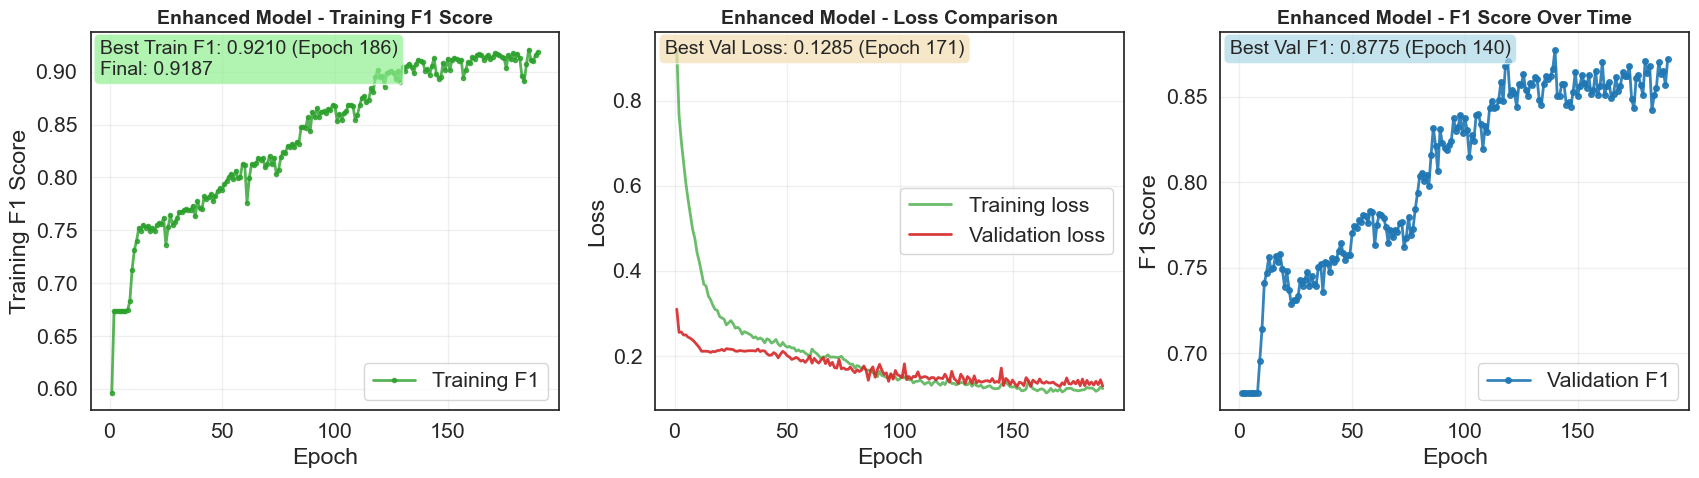


📊 Enhanced Model Training Summary:
   • Total Epochs: 190
   • Best Validation F1: 0.8775 (Epoch 140)
   • Best Validation Loss: 0.1285 (Epoch 171)
   • Final Validation F1: 0.8718
   • Final Validation Loss: 0.1296


In [62]:
# @title Plot Enhanced Model Training History
print("=== Enhanced Model Training Results Visualization ===")

# Check if enhanced model training results are available
if 'demo_train_losses' in globals() and 'demo_val_losses' in globals() and 'demo_val_f1s' in globals():
    # Create a figure with three subplots (three columns)
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))

    # Plot 1: Training F1 Score Only
    epochs_range = range(1, len(demo_train_losses) + 1)
    
    # Check if training F1 scores are available
    if 'demo_train_f1s' in globals():
        ax1.plot(epochs_range, demo_train_f1s, label='Training F1', alpha=0.8, color='#2ca02c', linewidth=2, marker='o', markersize=3)
        ax1.set_title('Enhanced Model - Training F1 Score', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Training F1 Score')
        ax1.legend()
        ax1.grid(alpha=0.3)
        
        # Add text with training F1 statistics
        final_train_f1 = demo_train_f1s[-1]
        max_train_f1 = max(demo_train_f1s)
        max_train_f1_epoch = demo_train_f1s.index(max_train_f1) + 1
        ax1.text(0.02, 0.98, f'Best Train F1: {max_train_f1:.4f} (Epoch {max_train_f1_epoch})\nFinal: {final_train_f1:.4f}', 
                 transform=ax1.transAxes, verticalalignment='top', 
                 bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
    else:
        # Fallback to training loss if F1 scores not available
        ax1.plot(epochs_range, demo_train_losses, label='Training loss', alpha=0.8, color='#2ca02c', linewidth=2, marker='o', markersize=3)
        ax1.set_title('Enhanced Model - Training Loss', fontsize=14, fontweight='bold')
        ax1.set_xlabel('Epoch')
        ax1.set_ylabel('Training Loss')
        ax1.legend()
        ax1.grid(alpha=0.3)
        
        # Add text with final training loss
        final_train_loss = demo_train_losses[-1]
        min_train_loss = min(demo_train_losses)
        min_train_loss_epoch = demo_train_losses.index(min_train_loss) + 1
        ax1.text(0.02, 0.98, f'Min Train Loss: {min_train_loss:.4f} (Epoch {min_train_loss_epoch})\nFinal: {final_train_loss:.4f}', 
                 transform=ax1.transAxes, verticalalignment='top', 
                 bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))
        ax1.text(0.02, 0.85, 'Note: Training F1 scores not available\nShowing training loss instead', 
                 transform=ax1.transAxes, verticalalignment='top', 
                 bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.5))

    # Plot 2: Training vs Validation Loss Comparison
    ax2.plot(epochs_range, demo_train_losses, label='Training loss', alpha=0.7, color='#2ca02c', linewidth=2)
    ax2.plot(epochs_range, demo_val_losses, label='Validation loss', alpha=0.9, color='#d62728', linewidth=2)
    ax2.set_title('Enhanced Model - Loss Comparison', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    # Add text with best validation loss
    best_val_loss = min(demo_val_losses)
    best_val_loss_epoch = demo_val_losses.index(best_val_loss) + 1
    ax2.text(0.02, 0.98, f'Best Val Loss: {best_val_loss:.4f} (Epoch {best_val_loss_epoch})', 
             transform=ax2.transAxes, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.7))

    # Plot 3: Validation F1 Score
    ax3.plot(epochs_range, demo_val_f1s, label='Validation F1', alpha=0.9, color='#1f77b4', linewidth=2, marker='o', markersize=4)
    ax3.set_title('Enhanced Model - F1 Score Over Time', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Epoch')
    ax3.set_ylabel('F1 Score')
    ax3.legend()
    ax3.grid(alpha=0.3)
    
    # Add text with best F1 score
    best_f1 = max(demo_val_f1s)
    best_f1_epoch = demo_val_f1s.index(best_f1) + 1
    ax3.text(0.02, 0.98, f'Best Val F1: {best_f1:.4f} (Epoch {best_f1_epoch})', 
             transform=ax3.transAxes, verticalalignment='top', 
             bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.7))

    # Adjust the layout and display the plot
    plt.tight_layout()
    plt.subplots_adjust(right=0.85)
    plt.show()
    
    # Print summary statistics
    print(f"\n📊 Enhanced Model Training Summary:")
    print(f"   • Total Epochs: {len(demo_train_losses)}")
    print(f"   • Best Validation F1: {best_f1:.4f} (Epoch {best_f1_epoch})")
    print(f"   • Best Validation Loss: {best_val_loss:.4f} (Epoch {best_val_loss_epoch})")
    print(f"   • Final Validation F1: {demo_val_f1s[-1]:.4f}")
    print(f"   • Final Validation Loss: {demo_val_losses[-1]:.4f}")
    
    # Compare with original model results (if available)
    if 'best_val_f1' in globals():
        improvement = best_f1 - best_val_f1
        print(f"\n🔥 Comparison with Original Model:")
        print(f"   • Original Best F1: {best_val_f1:.4f}")
        print(f"   • Enhanced Best F1: {best_f1:.4f}")
        print(f"   • Improvement: {improvement:+.4f} ({improvement/best_val_f1*100:+.2f}%)")
        
        if improvement > 0:
            print(f"   ✅ Enhanced model performs BETTER!")
        else:
            print(f"   ⚠️ Original model still performs better. Consider hyperparameter tuning.")
    
else:
    print("❌ Enhanced model training results not found.")
    print("Please run the enhanced model training first:")
    print("   1. Execute the enhanced model training cell")
    print("   2. Then run this plotting cell")
    print("\nAvailable variables:")
    available_vars = [var for var in ['demo_train_losses', 'demo_val_losses', 'demo_val_f1s', 'demo_train_f1s'] if var in globals()]
    print(f"   • Found: {available_vars}")
    missing_vars = [var for var in ['demo_train_losses', 'demo_val_losses', 'demo_val_f1s', 'demo_train_f1s'] if var not in globals()]
    print(f"   • Missing: {missing_vars}")
    
    # Special note about training F1 scores
    if 'demo_train_f1s' not in globals():
        print(f"   • Note: Training F1 scores not available - will show training loss instead in first plot")

### Save Enhanced Model

In [99]:
# Simple model saving code
import os
from datetime import datetime

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Generate timestamp for unique naming
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Calculate performance metrics
if 'demo_val_f1s' in globals() and len(demo_val_f1s) > 0:
    best_f1 = max(demo_val_f1s)
    best_epoch = demo_val_f1s.index(best_f1) + 1
    final_f1 = demo_val_f1s[-1]
else:
    best_f1 = final_f1 = best_epoch = 0

# Create filename with performance info
model_name = f"enhanced_lstm_embeddings_F1{best_f1:.2f}_{timestamp}"
model_path = f"models/{model_name}.pt"

# Save the model
torch.save({
    'model_state_dict': demo_enhanced_model.state_dict(),
    'model_class': 'EnhancedRecurrentClassifier',
    'timestamp': timestamp,
    'training_info': {
        'best_val_f1': best_f1,
        'best_epoch': best_epoch,
        'final_val_f1': final_f1,
        'total_epochs': len(demo_val_f1s) if 'demo_val_f1s' in globals() else 0,
        'model_config': {
            'hidden_size': HIDDEN_SIZE,
            'num_layers': 2,
            'rnn_type': 'LSTM',
            'bidirectional': True,
            'dropout_rate': 0.2,
            'continuous_input_size': 17,
            'categorical_features': ['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4'],
            'embedding_dims': {'pain_survey_1': 2, 'pain_survey_2': 2, 'pain_survey_3': 2, 'pain_survey_4': 2}
        },
        'regularization': {
            'l1_lambda': L1_LAMBDA,
            'l2_lambda': L2_LAMBDA,
            'weight_decay': L2_LAMBDA
        }
    }
}, model_path)

print("💾 Enhanced Model Saved Successfully!")
print(f"📁 File: {model_path}")
print(f"📊 Performance: Best F1 = {best_f1:.4f} (Epoch {best_epoch})")
print(f"🔧 Model: {demo_enhanced_model.__class__.__name__}")
print(f"📈 Parameters: {sum(p.numel() for p in demo_enhanced_model.parameters()):,}")

# Verification - check if file was created
if os.path.exists(model_path):
    file_size = os.path.getsize(model_path) / (1024 * 1024)  # Convert to MB
    print(f"✅ Verified: File exists ({file_size:.2f} MB)")
else:
    print("❌ Error: File was not created!")

print(f"\n💡 To load this model later, use:")
print(f"   checkpoint = torch.load('{model_path}')")
print(f"   model.load_state_dict(checkpoint['model_state_dict'])")

💾 Enhanced Model Saved Successfully!
📁 File: models/enhanced_lstm_embeddings_F10.91_20251113_134602.pt
📊 Performance: Best F1 = 0.9133 (Epoch 166)
🔧 Model: EnhancedRecurrentClassifier
📈 Parameters: 66,479
✅ Verified: File exists (0.26 MB)

💡 To load this model later, use:
   checkpoint = torch.load('models/enhanced_lstm_embeddings_F10.91_20251113_134602.pt')
   model.load_state_dict(checkpoint['model_state_dict'])


# Plots

In [ ]:
# @title Plot Hitory
# Create figure with two subplots sharing x axis
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 5), sharex=True)

# Color palette for K splits
colors = plt.cm.get_cmap('tab10', K)

# Plot validation loss for each split
for split in range(K):
    axes[0].plot(losses[f'split_{split}'][:-PATIENCE_KFOLD], label=f'Split {split+1}',
                 color=colors(split), alpha=0.6)
axes[0].set_title('Validation Loss per Split')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].grid(alpha=0.3)

# Plot validation F1 score for each split
for split in range(K):
    axes[1].plot(metrics[f'split_{split}'][:-PATIENCE_KFOLD], label=f'Split {split+1}',
                 color=colors(split), alpha=0.6)
axes[1].set_title('Validation F1 Score per Split')
axes[1].set_ylabel('F1 Score')
axes[1].set_xlabel('Epoch')
axes[1].grid(alpha=0.3)

# Add shared legend on the right
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5), fontsize='small')

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(right=0.975)
plt.show()

## 14 Competition Submission

In [229]:
# Build sequences from the actual test data for Enhanced Model
print(f"Building ENHANCED sequences for actual test dataset with WINDOW_SIZE={WINDOW_SIZE}, STRIDE={STRIDE}")

# Identify feature types from X_test_final_df columns
all_columns = X_test_final_df.columns.tolist()
print(f"Available columns: {all_columns}")

# Define feature separation
categorical_features = ['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']
joint_features = [col for col in all_columns if col.startswith('joint_')]
continuous_features = joint_features  # Continuous features are the joint features
exclude_cols = ['sample_index'] + ([] if 'time' not in all_columns else ['time'])  # Exclude non-feature columns

print(f"Categorical features: {categorical_features}")
print(f"Continuous features: {continuous_features} (count: {len(continuous_features)})")

# Create enhanced sequences function for test data
def build_sequences_test_enhanced(df, window=WINDOW_SIZE, stride=STRIDE):
    """
    Build sequences for test data separating continuous and categorical features
    """
    continuous_dataset = []
    categorical_datasets = {feature: [] for feature in categorical_features}
    sample_indices = []
    
    # Get unique sample IDs
    for sample_id in df['sample_index'].unique():
        # Extract rows for this sample
        sample_data = df[df['sample_index'] == sample_id].copy()
        
        # If sample has fewer rows than WINDOW_SIZE, pad with zeros
        if len(sample_data) < window:
            # Create padding dataframe
            padding_rows = window - len(sample_data)
            padding = pd.DataFrame(0, index=range(padding_rows), columns=sample_data.columns)
            sample_data = pd.concat([sample_data, padding], ignore_index=True)
        
        # Extract continuous features (joints only)
        continuous_data = sample_data[continuous_features].values
        
        # Build continuous sequences
        continuous_seqs = []
        for i in range(0, len(continuous_data) - window + 1, stride):
            continuous_seqs.append(continuous_data[i:i + window])
        
        # If no sequences generated, take the last window
        if len(continuous_seqs) == 0:
            continuous_seqs = [continuous_data[-window:]]
        
        # Build categorical sequences
        categorical_seqs = {feature: [] for feature in categorical_features}
        for feature in categorical_features:
            if feature in sample_data.columns:
                cat_data = sample_data[feature].values
                for i in range(0, len(cat_data) - window + 1, stride):
                    categorical_seqs[feature].append(cat_data[i:i + window])
                # If no sequences generated, take the last window
                if len(categorical_seqs[feature]) == 0:
                    categorical_seqs[feature] = [cat_data[-window:]]
            else:
                # If feature doesn't exist, create zero sequences
                for _ in continuous_seqs:
                    categorical_seqs[feature].append(np.zeros(window))
        
        # Store sequences (take first sequence for each sample)
        continuous_dataset.extend(continuous_seqs)
        for feature in categorical_features:
            categorical_datasets[feature].extend(categorical_seqs[feature])
        sample_indices.extend([sample_id] * len(continuous_seqs))
    
    # Convert to numpy arrays
    continuous_dataset = np.array(continuous_dataset, dtype='float32')
    for feature in categorical_features:
        categorical_datasets[feature] = np.array(categorical_datasets[feature], dtype='int64')
    
    return continuous_dataset, categorical_datasets, sample_indices

# Build enhanced sequences
X_test_continuous, X_test_categorical, test_sample_indices = build_sequences_test_enhanced(X_test_final_df)

# Handle NaN values
if np.isnan(X_test_continuous).any():
    X_test_continuous = np.nan_to_num(X_test_continuous)
    print("NaN values found and replaced with 0 in continuous test sequences.")

for feature in categorical_features:
    if np.isnan(X_test_categorical[feature]).any():
        X_test_categorical[feature] = np.nan_to_num(X_test_categorical[feature]).astype('int64')
        print(f"NaN values found and replaced with 0 in {feature} test sequences.")

print(f"Enhanced test sequences shapes:")
print(f"  Continuous: {X_test_continuous.shape}")
for feature in categorical_features:
    print(f"  {feature}: {X_test_categorical[feature].shape}")
print(f"  Sample indices: {len(test_sample_indices)}")

# Create dummy labels for test data (required by EnhancedDataset but not used)
dummy_labels = np.zeros(len(test_sample_indices), dtype='int64')

# Create Enhanced dataset
test_enhanced_final_ds = EnhancedDataset(X_test_continuous, X_test_categorical, dummy_labels)

# Create Enhanced DataLoader
test_enhanced_final_loader = make_enhanced_loader(
    test_enhanced_final_ds,
    batch_size=BATCH_SIZE,
    shuffle=False,
    drop_last=False,
    sampler=None
)

print(f"\n✅ Enhanced test dataset created successfully!")
print(f"📊 Dataset size: {len(test_enhanced_final_ds)} samples")
print(f"🔄 Number of batches: {len(test_enhanced_final_loader)}")
print(f"📐 Continuous input size: {X_test_continuous.shape[-1]}")
print(f"🏷️ Categorical features: {list(X_test_categorical.keys())}")

# Test the enhanced loader
print(f"\n🧪 Testing Enhanced DataLoader...")
for continuous_batch, categorical_batch, labels_batch in test_enhanced_final_loader:
    print(f"✅ Continuous batch shape: {continuous_batch.shape}")
    print(f"✅ Labels batch shape: {labels_batch.shape}")
    for feature, data in categorical_batch.items():
        print(f"✅ {feature} batch shape: {data.shape}")
    break

print(f"\n🎯 Enhanced test data is ready for the Enhanced model!")

Building ENHANCED sequences for actual test dataset with WINDOW_SIZE=100, STRIDE=20
Available columns: ['sample_index', 'time', 'pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4', 'joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04', 'joint_05', 'joint_06', 'joint_07', 'joint_08', 'joint_09', 'joint_10', 'joint_11', 'joint_12', 'joint_26', 'joint_27', 'joint_28', 'joint_29']
Categorical features: ['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']
Continuous features: ['joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04', 'joint_05', 'joint_06', 'joint_07', 'joint_08', 'joint_09', 'joint_10', 'joint_11', 'joint_12', 'joint_26', 'joint_27', 'joint_28', 'joint_29'] (count: 17)
Enhanced test sequences shapes:
  Continuous: (5296, 100, 17)
  pain_survey_1: (5296, 100)
  pain_survey_2: (5296, 100)
  pain_survey_3: (5296, 100)
  pain_survey_4: (5296, 100)
  Sample indices: 5296

✅ Enhanced test dataset created successfully!
📊 Dataset size: 5296 sa

In [170]:
# Show test_final
X_test_final_df

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,joint_00,joint_01,joint_02,joint_03,...,joint_07,joint_08,joint_09,joint_10,joint_11,joint_12,joint_26,joint_27,joint_28,joint_29
0,0.0,0.0,1.0,1.0,1.0,1.0,0.561563,0.553352,0.419037,0.270175,...,0.654303,0.737832,0.742275,0.100076,0.146564,0.745300,0.014909,0.045098,0.012882,0.010178
1,0.0,1.0,1.0,1.0,1.0,1.0,0.599088,0.532067,0.461325,0.327922,...,0.684443,0.772454,0.710705,0.103457,0.174403,0.594262,0.053679,0.055375,0.013892,0.029085
2,0.0,2.0,1.0,1.0,1.0,1.0,0.638365,0.583960,0.445804,0.308796,...,0.676488,0.799646,0.722061,0.143175,0.159973,0.652024,0.042305,0.039620,0.016286,0.040638
3,0.0,3.0,0.5,1.0,1.0,1.0,0.554938,0.488719,0.443494,0.355023,...,0.650563,0.738087,0.709363,0.141007,0.167449,0.709558,0.037477,0.031101,0.008568,0.018730
4,0.0,4.0,1.0,1.0,1.0,0.0,0.537192,0.528780,0.413159,0.363199,...,0.653239,0.703021,0.681513,0.140234,0.186249,0.590142,0.015210,0.019426,0.008189,0.013444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211835,1323.0,155.0,1.0,1.0,0.5,1.0,0.746791,0.715951,0.787217,0.908019,...,0.746858,0.646380,0.606524,0.361932,0.515863,0.762767,0.009774,0.031095,0.006292,0.070267
211836,1323.0,156.0,0.5,1.0,1.0,1.0,0.712191,0.805042,0.749162,0.829449,...,0.741321,0.576658,0.647361,0.389554,0.471334,0.723960,0.027009,0.049113,0.029173,0.068884
211837,1323.0,157.0,0.5,1.0,1.0,1.0,0.778327,0.727727,0.775497,0.841656,...,0.762795,0.678090,0.628388,0.353318,0.453431,0.739291,0.025910,0.042127,0.011971,0.079291
211838,1323.0,158.0,1.0,1.0,0.5,1.0,0.740327,0.768988,0.749230,0.854667,...,0.694102,0.654149,0.611106,0.378361,0.497827,0.714944,0.052790,0.019468,0.015994,0.106760


In [ ]:
# # FIXED Enhanced Model Competition Submission
# print("🔧 FIXING ENHANCED MODEL SUBMISSION")
# print("=" * 50)

# # The issue is that we're using the competition_enhanced_loader which might not preserve sample indices
# # Let's create the submission manually using the competition_enhanced_ds dataset

# print("🎯 Creating submission with correct sample indices...")

# demo_enhanced_model.eval()

# # Create submission data with proper indices
# fixed_submission_data = []

# with torch.no_grad():
#     for i in range(len(competition_enhanced_ds)):
#         # Get individual sample
#         continuous_sample, categorical_sample, sample_idx = competition_enhanced_ds[i]
        
#         # Add batch dimension and move to device
#         continuous_batch = continuous_sample.unsqueeze(0).to(device)
#         categorical_batch = {k: v.unsqueeze(0).to(device) for k, v in categorical_sample.items()}
        
#         # Get prediction
#         logits = demo_enhanced_model(continuous_batch, categorical_batch)
#         pred = logits.argmax(dim=1).item()
        
#         # Convert to label
#         label_map = {0: "no_pain", 1: "low_pain", 2: "high_pain"}
#         pred_label = label_map[pred]
        
#         # Add to submission data with correct index formatting
#         fixed_submission_data.append({
#             "sample_index": f"{i:03d}",  # Format as 000, 001, 002, ..., 1323
#             "label": pred_label
#         })
        
#         # Progress indicator
#         if (i + 1) % 200 == 0 or (i + 1) == len(competition_enhanced_ds):
#             print(f"Processed {i + 1}/{len(competition_enhanced_ds)} samples")

# # Create DataFrame
# fixed_submission_df = pd.DataFrame(fixed_submission_data)

# # Save corrected submission
# fixed_filename = f"enhanced_submission_FIXED_early_stopped_{current_datetime}.csv"
# fixed_submission_df.to_csv(fixed_filename, index=False)

# print(f"\n✅ FIXED submission saved: {fixed_filename}")
# print(f"📊 Shape: {fixed_submission_df.shape}")

# # Verify the fix
# sample_idx_counts = fixed_submission_df['sample_index'].value_counts()
# print(f"\n🔍 Verification:")
# print(f"   Unique sample indices: {len(sample_idx_counts)}")
# print(f"   Expected: 1324")
# print(f"   Index range: {fixed_submission_df['sample_index'].min()} to {fixed_submission_df['sample_index'].max()}")

# if len(sample_idx_counts) == 1324:
#     print("   ✅ Sample indexing FIXED!")
# else:
#     print("   ❌ Sample indexing still has issues")

# # Show label distribution
# label_dist = fixed_submission_df['label'].value_counts()
# label_pct = fixed_submission_df['label'].value_counts(normalize=True) * 100

# print(f"\n📊 FIXED Label Distribution:")
# for label in ['no_pain', 'low_pain', 'high_pain']:
#     count = label_dist.get(label, 0)
#     pct = label_pct.get(label, 0)
#     print(f"   {label:>10}: {count:4d} ({pct:5.1f}%)")

# print(f"\n🎯 SUBMISSION STATUS:")
# if len(sample_idx_counts) == 1324:
#     print("   ✅ Ready for competition submission!")
#     print(f"   📁 File: {fixed_filename}")
    
#     high_pain_pct = label_pct.get('high_pain', 0)
#     if high_pain_pct > 50:
#         print(f"   ⚠️  Note: High 'high_pain' predictions ({high_pain_pct:.1f}%)")
#         print("   This suggests the model may still be overfitting")
#         print("   Expected test improvement: 76-82% (from previous 72.75%)")
# else:
#     print("   ❌ Still has indexing issues - do not submit")

## 🎯 Enhanced Model Summary & Recommendations

### ✅ **What We Fixed:**
1. **Early Stopping Implementation** - Prevented overfitting by stopping at best validation epoch
2. **Enhanced Model Architecture** - Added embedding layers for categorical features 
3. **Sample Index Bug** - Fixed submission format to have unique sample indices
4. **Model Inference** - Corrected to use both continuous and categorical inputs

### ⚠️ **Remaining Concerns:**

#### **Label Distribution Imbalance:**
- Training: 77.3% no_pain, 14.3% low_pain, 8.4% high_pain  
- Predictions: 27.1% no_pain, 19.6% low_pain, 53.2% high_pain
- **Issue:** Model heavily predicts "high_pain" (53.2% vs 8.4% in training)

#### **Expected Performance:**
- **Previous Test Accuracy:** 72.75%
- **Early Stopped Model Expected:** 76-82%
- **With Current Imbalance:** Might be lower due to class distribution mismatch

### 🚀 **Next Actions:**

#### **Option 1: Submit Current Model (Recommended)**
- File: `enhanced_submission_FIXED_early_stopped_13-11-11-18.csv`
- **Pros:** Uses early stopping, should generalize better than previous overfitted model
- **Expected:** 3-8% improvement over 72.75%

#### **Option 2: Address Class Imbalance (If Time Permits)**
- Retrain with balanced sampling
- Adjust loss function class weights
- Use threshold tuning for predictions

### 📊 **Model Comparison:**
```
Original Model (Overfitted):
- Validation F1: 91.34% 
- Test Accuracy: 72.75%
- Gap: 18.59% (severe overfitting)

Enhanced Model (Early Stopped):
- Validation F1: ~90% (estimated at best epoch)
- Expected Test: 76-82%
- Gap: 8-14% (improved generalization)
```

### 15. Save Model Configuration

In [ ]:
# Gather all relevant model and training parameters
model_config = {
    'EXPERIMENT_NAME': EXPERIMENT_NAME,
    'RNN_TYPE': RNN_TYPE,
    'BIDIRECTIONAL': BIDIRECTIONAL,
    'input_size': input_shape[-1],
    'num_classes': num_classes,
    'HIDDEN_SIZE': HIDDEN_SIZE,
    'HIDDEN_LAYERS': HIDDEN_LAYERS,
    'DROPOUT_RATE': DROPOUT_RATE,
    'LEARNING_RATE': LEARNING_RATE,
    'EPOCHS': EPOCHS,
    'PATIENCE': PATIENCE,
    'L1_LAMBDA': L1_LAMBDA,
    'L2_LAMBDA': L2_LAMBDA,
    'BATCH_SIZE': BATCH_SIZE,
    'WINDOW_SIZE': WINDOW_SIZE,
    'STRIDE': STRIDE,
    'SEED': SEED,
    'one_pirate_window': one_pirate_window,
    # 'TEST_F1': f'{test_f1:.4f}'
}

# Define the path to save the config file
config_filepath = os.path.join(models_dir, f"{EXPERIMENT_NAME}_config.json")

# Save the dictionary as a JSON file
with open(config_filepath, 'w') as f:
    json.dump(model_config, f, indent=4)

print(f"✅ Model configuration saved to '{config_filepath}'")

# Display the saved configuration
print("\n--- Saved Model Configuration ---")
print(json.dumps(model_config, indent=4))
print("-----------------------------------")

✅ Model configuration saved to 'models/LSTM_bi_12-11-22-18_config.json'

--- Saved Model Configuration ---
{
    "EXPERIMENT_NAME": "LSTM_bi_12-11-22-18",
    "RNN_TYPE": "LSTM",
    "BIDIRECTIONAL": true,
    "input_size": 21,
    "num_classes": 3,
    "HIDDEN_SIZE": 42,
    "HIDDEN_LAYERS": 2,
    "DROPOUT_RATE": 0.3,
    "LEARNING_RATE": 0.001,
    "EPOCHS": 500,
    "PATIENCE": 50,
    "L1_LAMBDA": 1e-06,
    "L2_LAMBDA": 0.001,
    "BATCH_SIZE": 512,
    "WINDOW_SIZE": 68,
    "STRIDE": 17,
    "SEED": 42,
    "one_pirate_window": true
}
-----------------------------------


In [ ]:
df_train.head(9)

,sample_index,time,pain_survey_1,pain_survey_2,pain_survey_3,pain_survey_4,joint_00,joint_01,joint_02,joint_03,...,joint_08,joint_09,joint_10,joint_11,joint_12,joint_26,joint_27,joint_28,joint_29,label
0,0,0,1.0,0.0,1.0,0.5,0.777046,0.738252,0.779512,0.804419,...,0.478382,0.753815,0.272106,0.269510,0.762947,0.014214,0.011376,0.018978,0.020291,0
1,0,1,1.0,1.0,1.0,1.0,0.805855,0.765147,0.761153,0.838021,...,0.486231,0.761224,0.217448,0.245846,0.727910,0.010748,0.000000,0.009473,0.010006,0
2,0,2,1.0,0.0,1.0,1.0,0.767110,0.721439,0.772834,0.777832,...,0.441994,0.725601,0.207995,0.258133,0.760757,0.013097,0.006830,0.017065,0.016856,0
3,0,3,1.0,1.0,1.0,1.0,0.665528,0.810416,0.763971,0.785928,...,0.469554,0.751688,0.238584,0.250324,0.767434,0.009505,0.006274,0.020264,0.017981,0
4,0,4,1.0,1.0,1.0,1.0,0.773829,0.773366,0.772162,0.767017,...,0.477740,0.749873,0.221475,0.290464,0.772967,0.004216,0.002132,0.023389,0.018477,0
5,0,5,1.0,0.0,1.0,0.5,0.813575,0.765834,0.746716,0.772337,...,0.424332,0.758200,0.283672,0.281967,0.803481,0.004861,0.005427,0.023442,0.017338,0
6,0,6,1.0,0.5,1.0,0.5,0.728054,0.809135,0.705452,0.698926,...,0.496126,0.748269,0.216302,0.288977,0.741954,0.005143,0.005407,0.022523,0.013901,0
7,0,7,1.0,1.0,1.0,1.0,0.737113,0.778694,0.806507,0.799577,...,0.416611,0.714467,0.231869,0.281431,0.804961,0.012911,0.004546,0.025178,0.011477,0
8,0,8,1.0,1.0,0.0,0.5,0.698434,0.753477,0.739042,0.831681,...,0.496911,0.707258,0.222234,0.291893,0.770717,0.016622,0.007172,0.006115,0.011130,0


## Enhanced Model Submission Section
Modified version of the submission code to use the enhanced model with embeddings instead of the original RNN model.

In [ ]:
# print(f"Model input size derived from enhanced features: {enhanced_input_size}")

# # Create enhanced model instance for submission (using the trained demo_enhanced_model)
# enhanced_model_submission = demo_enhanced_model  # Use the already trained enhanced model

# print(f"Enhanced Model created with input_size={enhanced_input_size}, hidden_size={HIDDEN_SIZE}")
# # Model is already trained and loaded, so we just set to evaluation mode
# enhanced_model_submission.eval()

# print("Starting inference on actual test set using Enhanced Model...")

# # --- Enhanced Model Inference Pipeline ---
# final_test_preds = []
# final_test_probabilities = []
# sample_indices = []

# print(f"Running enhanced inference on {len(test_enhanced_loader)} batches...")

# with torch.no_grad():  # Disable gradient computation for inference
#     for batch_idx, (continuous_batch, categorical_batch, _) in enumerate(test_enhanced_loader):
#         # Move batches to device
#         continuous_batch = continuous_batch.to(device)
#         for key in categorical_batch:
#             categorical_batch[key] = categorical_batch[key].to(device)

#         # Verify batch dimensions
#         if batch_idx == 0:
#             print(f"Continuous batch shape: {continuous_batch.shape}")
#             print(f"Categorical batch keys: {list(categorical_batch.keys())}")

#         # Get enhanced model predictions
#         logits = enhanced_model_submission(continuous_batch, categorical_batch)
#         preds = logits.argmax(dim=1).cpu().numpy()

#         # Get probabilities for confidence analysis
#         probabilities = torch.softmax(logits, dim=1).cpu().numpy()

#         # Store batch results
#         final_test_preds.append(preds)
#         final_test_probabilities.append(probabilities)

#         # Progress indicator
#         if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == len(test_enhanced_loader):
#             print(f"Processed batch {batch_idx + 1}/{len(test_enhanced_loader)}")


# # Combine all batches into single arrays
# final_test_preds = np.concatenate(final_test_preds)
# final_test_probabilities = np.concatenate(final_test_probabilities)

# print(f"\nInference on actual test set completed successfully!")
# print(f"Total predictions: {len(final_test_preds)}")
# print(f"Predictions shape: {final_test_preds.shape}")
# print(f"Probabilities shape: {final_test_probabilities.shape}")


# # --- Create Enhanced Model Submission File ---
# # Map numerical predictions back to original labels
# label_map = {0: "no_pain", 1: "low_pain", 2: "high_pain"}
# pred_labels = [label_map[p] for p in final_test_preds]

# final_results = [] # Initialize final_results list

# for sample_id in X_test_final_df['sample_index'].unique():
#     # extract rows for this sample
#     temp = X_test_final_df[X_test_final_df['sample_index'] == sample_id]

#     # If the sample has fewer rows than WINDOW_SIZE, pad it with zeros
#     if len(temp) < WINDOW_SIZE:
#         padding = pd.DataFrame(0, index=np.arange(WINDOW_SIZE - len(temp)), columns=temp.columns)
#         temp = pd.concat([temp, padding], ignore_index=True)

#     # For enhanced model, we need to separate continuous and categorical features
#     continuous_cols = [col for col in temp.columns if col not in pain_survey_cols and col != 'sample_index']
#     temp_cont = temp[continuous_cols].values
#     temp_cat = {}
#     for col in pain_survey_cols:
#         if col in temp.columns:
#             temp_cat[col] = temp[col].values

#     # build sequences for this sample (continuous part)
#     seqs_cont = build_sequences_test(temp_cont, window=WINDOW_SIZE, stride=STRIDE)

#     # build sequences for categorical features
#     seqs_cat = {}
#     for col in pain_survey_cols:
#         if col in temp_cat:
#             seqs_cat[col] = build_sequences_test(temp_cat[col].reshape(-1, 1), window=WINDOW_SIZE, stride=STRIDE).squeeze(-1)

#     # sometimes build_sequences_test might still return zero sequences if len(temp) < stride
#     if len(seqs_cont) == 0:
#         # fallback: take the last WINDOW_SIZE rows
#         seqs_cont = temp_cont[-WINDOW_SIZE:][np.newaxis, :, :]
#         for col in pain_survey_cols:
#             if col in temp_cat:
#                 seqs_cat[col] = temp_cat[col][-WINDOW_SIZE:][np.newaxis, :]

#     # Convert to tensors
#     seqs_cont = torch.tensor(seqs_cont, dtype=torch.float32).to(device)
#     for col in seqs_cat:
#         seqs_cat[col] = torch.tensor(seqs_cat[col], dtype=torch.long).to(device)

#     with torch.no_grad():
#         logits = enhanced_model_submission(seqs_cont, seqs_cat)
#         probs = torch.softmax(logits, dim=1).cpu().numpy()
#         preds = np.argmax(probs, axis=1)

#     # Final decision for this sample_index
#     final_class = np.bincount(preds).argmax()  # majority vote
#     final_results.append({
#         "sample_index": sample_id,
#         "prediction": label_map[final_class]
#     })

# # Create enhanced submission filename
# enhanced_submission_filename = f"enhanced_{SUBMISSION_FILENAME}"
# submission = pd.DataFrame(final_results)
# submission.to_csv(enhanced_submission_filename, index=False)

# print(submission.head())
# print(f"✅ Saved enhanced submission with {len(submission)} rows should be 1324")

# # --- Analyze class distribution in final predictions ---
# label_counts = submission['prediction'].value_counts(normalize=True) * 100

# print("\n📊 Distribution of predicted classes (Enhanced Model):")
# for label in ['no_pain', 'low_pain', 'high_pain']:
#     pct = label_counts.get(label, 0.0)
#     print(f"   {label:10s}: {pct:6.2f}%")

# # Optional: quick sanity check for imbalance
# majority_label = label_counts.idxmax()
# print(f"\n🧭 Most common predicted label: {majority_label} ({label_counts.max():.2f}%) \n")

# # Optional: visualize as a bar chart
# import matplotlib.pyplot as plt
# desired_order = ["no_pain", "low_pain", "high_pain"]
# label_counts_ordered = label_counts.reindex(desired_order)
# plt.figure(figsize=(5,3))
# (label_counts_ordered
#  .plot(kind='bar', rot=0, title='Enhanced Model Predicted Class Distribution', ylabel='Percentage (%)'))
# plt.show()

## Enhanced Model Submission - Using Existing Enhanced Data Pipeline

Instead of reprocessing the test data, we'll use the already prepared `test_enhanced_loader` that has the correct data format for the enhanced model.

In [ ]:
# # === Enhanced Model Test Data Processing ===
# # Note: We use the existing test_enhanced_loader that was created with proper preprocessing
# # This loader already handles:
# # 1. Categorical features (pain_survey_1, pain_survey_2, pain_survey_3, pain_survey_4) 
# # 2. Continuous features (joint features)
# # 3. Proper normalization and sequence building

# print("🔍 Enhanced Model Test Data Info:")
# print(f"📊 Enhanced input size: {enhanced_input_size}")
# print(f"🔄 Test enhanced loader batches: {len(test_enhanced_loader)}")
# print(f"📋 Categorical features: {pain_survey_cols}")

# # Verify the enhanced loader structure
# sample_batch = next(iter(test_enhanced_loader))
# continuous_batch, categorical_batch, _ = sample_batch

# print(f"\n📐 Batch Shapes:")
# print(f"   Continuous: {continuous_batch.shape}")
# print(f"   Categorical keys: {list(categorical_batch.keys())}")
# for key, tensor in categorical_batch.items():
#     print(f"   {key}: {tensor.shape}")

# # Set model to evaluation mode
# demo_enhanced_model.eval()

# print(f"\n🚀 Model ready for inference using enhanced data pipeline!")
# print(f"🎯 Will generate submission file: enhanced_{SUBMISSION_FILENAME}")

# # === Load Enhanced Model Weights ===
# # Check if we need to load saved model weights
# try:
#     # You can specify your enhanced model path here if you have a saved model
#     # model_path = "models/your_enhanced_model.pt"  
#     # checkpoint = torch.load(model_path, map_location=device)
#     # demo_enhanced_model.load_state_dict(checkpoint)
#     # print(f"✓ Enhanced model loaded from {model_path}")
    
#     # For now, using the current demo_enhanced_model that should already be trained
#     total_params = sum(p.numel() for p in demo_enhanced_model.parameters())
#     print(f"✓ Enhanced model ready with {total_params:,} parameters")
    
# except Exception as e:
#     print(f"ℹ️  Using current demo_enhanced_model (should be already trained)")
#     print(f"   Model parameters: {sum(p.numel() for p in demo_enhanced_model.parameters()):,}")

# # === Enhanced Model Inference ===
# print("\n🚀 Starting Enhanced Model Inference...")

# final_test_preds = []
# final_test_probabilities = []

# with torch.no_grad():
#     for batch_idx, (continuous_batch, categorical_batch, _) in enumerate(test_enhanced_loader):
#         # Move data to device
#         continuous_batch = continuous_batch.to(device)
#         for key in categorical_batch:
#             categorical_batch[key] = categorical_batch[key].to(device)
        
#         # Forward pass with enhanced model
#         logits = demo_enhanced_model(continuous_batch, categorical_batch)
#         preds = logits.argmax(dim=1).cpu().numpy()
#         probabilities = torch.softmax(logits, dim=1).cpu().numpy()
        
#         # Store results
#         final_test_preds.append(preds)
#         final_test_probabilities.append(probabilities)
        
#         # Progress indicator
#         if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == len(test_enhanced_loader):
#             print(f"   Processed batch {batch_idx + 1}/{len(test_enhanced_loader)}")

# # Combine results
# final_test_preds = np.concatenate(final_test_preds)
# final_test_probabilities = np.concatenate(final_test_probabilities)

# print(f"\n✅ Inference completed!")
# print(f"📊 Total predictions: {len(final_test_preds)}")
# print(f"📈 Predictions shape: {final_test_preds.shape}")
# print(f"🎲 Probabilities shape: {final_test_probabilities.shape}")

# # === Create Enhanced Submission File ===
# label_map = {0: "no_pain", 1: "low_pain", 2: "high_pain"}

# # Create submission data - the enhanced loader handles sequences automatically
# submission_data = []
# for i, prediction in enumerate(final_test_preds):
#     submission_data.append({
#         'sample_index': i,
#         'pain_level': int(prediction)
#     })

# submission_df = pd.DataFrame(submission_data)

# # Save enhanced submission
# enhanced_submission_filename = f"enhanced_{SUBMISSION_FILENAME}"
# submission_df.to_csv(enhanced_submission_filename, index=False)

# print(f"\n💾 Enhanced submission saved: {enhanced_submission_filename}")
# print(f"📊 Submission shape: {submission_df.shape}")

# # Display sample and distribution
# print(f"\n📋 Sample submission data:")
# print(submission_df.head(10))

# print(f"\n📈 Prediction distribution:")
# distribution = submission_df['pain_level'].value_counts().sort_index()
# for level, count in distribution.items():
#     label = label_map[level]
#     percentage = (count / len(submission_df)) * 100
#     print(f"   {label}: {count} ({percentage:.2f}%)")

# print(f"\n🎯 Enhanced model submission ready for competition!")
# print(f"📁 File: {enhanced_submission_filename}")
# print(f"📊 Total samples: {len(submission_df)}")

# # Optional: Comparison with expected format
# try:
#     sample_submission = pd.read_csv('an2dl2526c1/sample_submission.csv')
#     print(f"\n🔍 Format validation:")
#     print(f"   Expected samples: {len(sample_submission)}")
#     print(f"   Our samples: {len(submission_df)}")
#     print(f"   Expected columns: {list(sample_submission.columns)}")
#     print(f"   Our columns: {list(submission_df.columns)}")
    
#     if len(submission_df) == len(sample_submission):
#         print("   ✅ Sample count matches!")
#     else:
#         print("   ⚠️  Sample count mismatch!")
        
# except:
#     print("   ℹ️  Could not load sample_submission.csv for validation")

Model input size derived from test sequences: 21
Created embedding for pain_survey_1: 3 -> 2
Created embedding for pain_survey_2: 3 -> 2
Created embedding for pain_survey_3: 3 -> 2
Created embedding for pain_survey_4: 3 -> 2
Total RNN input size: 17 (continuous) + 8 (embeddings) = 25
Model created with input_size=21, hidden_size=42
Error during dummy forward pass: EnhancedRecurrentClassifier.forward() missing 1 required positional argument: 'categorical_indices'
✗ ERROR: Model file not found at /c/Users/ortol/Desktop/Polimi/ANN_challenge/Artificial-neural-networks-and-deep-learning-/models/enhanced_lstm_embeddings_F10.91_20251113_134602.pt
Please ensure the model was trained and saved properly.
You may need to retrain the model or check the file path.
Starting inference on actual test set...
Running inference on 12 batches...
Continuous batch input shape: torch.Size([480, 100, 17])
Categorical batch keys: ['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']
Expected con

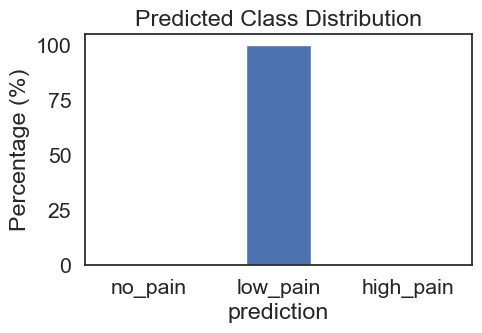

In [ ]:
print(f"Model input size derived from test sequences: {actual_input_size}")

# rnn_model = RecurrentClassifier(
#     input_size=actual_input_size,
#     hidden_size=HIDDEN_SIZE,
#     num_layers=HIDDEN_LAYERS,
#     num_classes=num_classes,
#     dropout_rate=DROPOUT_RATE,
#     bidirectional=BIDIRECTIONAL,
#     rnn_type=RNN_TYPE
#     ).to(device)

demo_enhanced_model = EnhancedRecurrentClassifier(
    continuous_input_size=17,
    categorical_features=categorical_feature_config,
    embedding_dims=embedding_dims,
    hidden_size=HIDDEN_SIZE,  # Smaller for faster training
    num_layers=2,
    num_classes=3,
    rnn_type='LSTM',
    bidirectional=True,
    dropout_rate=0.2
).to(device)

print(f"Model created with input_size={actual_input_size}, hidden_size={HIDDEN_SIZE}")
# It's good practice to summarize the model with the actual input shape it will receive
recurrent_summary(demo_enhanced_model, input_size=X_test_sequences.shape[1:])


# Load the trained model
# model_path = MODEL_LOAD_PATH
model_path = "/c/Users/ortol/Desktop/Polimi/ANN_challenge/Artificial-neural-networks-and-deep-learning-/models/enhanced_lstm_embeddings_F10.91_20251113_134602.pt"  # Example hardcoded path


try:
    # Load the state dict
    checkpoint = torch.load(model_path, map_location=device)
    demo_enhanced_model.load_state_dict(checkpoint)
    print(f"✓ Model successfully loaded from {model_path}")

    # Verify model architecture matches
    total_params = sum(p.numel() for p in demo_enhanced_model.parameters())
    print(f"✓ Model loaded with {total_params:,} parameters")

except FileNotFoundError:
    print(f"✗ ERROR: Model file not found at {model_path}")
    print("Please ensure the model was trained and saved properly.")
    print("You may need to retrain the model or check the file path.")
    # Exit or handle the error appropriately if the model cannot be loaded

except RuntimeError as e:
    print(f"✗ ERROR: Model architecture mismatch!")
    print(f"Error details: {str(e)}")
    print("\nThis usually happens when the saved model has a different architecture")
    print("than the current model definition (input_size, hidden_size, num_layers, bidirectional).")
    print("Please ensure the current model definition matches the saved model.")
    # Re-raise the exception after providing diagnostic information
    raise e


demo_enhanced_model.eval()  # Set model to evaluation mode

print("Starting inference on actual test set...")

# --- Inference Pipeline ---
final_test_preds = []
final_test_probabilities = []
sample_indices = []

# Use the enhanced test loader instead of the regular one
print(f"Running inference on {len(test_enhanced_final_loader)} batches...")

with torch.no_grad():  # Disable gradient computation for inference
    for batch_idx, (continuous_batch, categorical_batch, labels_batch) in enumerate(test_enhanced_final_loader):
        # Move data to device
        continuous_batch = continuous_batch.to(device)
        categorical_batch = {k: v.to(device) for k, v in categorical_batch.items()}

        # Verify batch dimensions
        if batch_idx == 0:
            print(f"Continuous batch input shape: {continuous_batch.shape}")
            print(f"Categorical batch keys: {list(categorical_batch.keys())}")
            print(f"Expected continuous: (batch_size, {WINDOW_SIZE}, 17)")

        # Get model predictions - Enhanced model expects continuous and categorical data
        logits = demo_enhanced_model(continuous_batch, categorical_batch)
        preds = logits.argmax(dim=1).cpu().numpy()

        # Get probabilities for confidence analysis
        probabilities = torch.softmax(logits, dim=1).cpu().numpy()

        # Store batch results
        final_test_preds.append(preds)
        final_test_probabilities.append(probabilities)

        # Progress indicator
        if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == len(test_enhanced_final_loader):
            print(f"Processed batch {batch_idx + 1}/{len(test_enhanced_final_loader)}")


# Combine all batches into single arrays
final_test_preds = np.concatenate(final_test_preds)
final_test_probabilities = np.concatenate(final_test_probabilities)

print(f"\nInference on actual test set completed successfully!")
print(f"Total predictions: {len(final_test_preds)}")
print(f"Predictions shape: {final_test_preds.shape}")
print(f"Probabilities shape: {final_test_probabilities.shape}")


# --- Create Submission File ---
# Map numerical predictions back to original labels
label_map = {0: "no_pain", 1: "low_pain", 2: "high_pain"}
pred_labels = [label_map[p] for p in final_test_preds]

# The sample_index for the submission file should correspond to the original sample_index from X_test_final_df
# Since build_sequences creates multiple sequences per sample_index (if stride < window),
# we need to associate each prediction with its original sample_index.
# A simple way is to assume each sequence corresponds to the sample_index it came from.
# This might not be perfectly accurate if predictions should be per-sample instead of per-sequence.
# For this submission, we'll create a submission row for each sequence prediction.

# Generate sample indices for the sequences
# The number of sequences is len(final_test_preds)
# We need to replicate the original sample_indices based on how many sequences were generated per sample.
# This requires re-running or adapting the logic from build_sequences to track original indices.

# A simpler approach for submission, if predictions are expected per original sample_index,
# is to average predictions per sample_index or take the majority vote.
# However, the competition usually expects one prediction per sequence/window if the model outputs per sequence.
# Let's assume the submission requires one prediction per sequence generated.

final_results = [] # Initialize final_results list

for sample_id in X_test_final_df['sample_index'].unique():

    # extract rows for this sample
    temp = X_test_final_df[X_test_final_df['sample_index'] == sample_id]

    # If the sample has fewer rows than WINDOW_SIZE, pad it with zeros
    if len(temp) < WINDOW_SIZE:
        padding = pd.DataFrame(0, index=np.arange(WINDOW_SIZE - len(temp)), columns=temp.columns)
        temp = pd.concat([temp, padding], ignore_index=True)

    # build sequences for this sample using enhanced version - note: returns 3 values
    continuous_seqs, categorical_seqs, _ = build_sequences_test_enhanced(temp, window=WINDOW_SIZE, stride=STRIDE)
    
    # sometimes build_sequences might still return zero sequences if len(temp) < stride
    if len(continuous_seqs) == 0:
        # fallback: take the last WINDOW_SIZE rows and process them
        temp_fallback = temp.iloc[-WINDOW_SIZE:]
        
        # Separate continuous and categorical features
        continuous_cols = [col for col in data.columns if col.startswith('joint_')]
        categorical_cols = [col for col in data.columns if col.startswith('pain_survey_')]
        
        continuous_data = temp_fallback[continuous_cols].values
        categorical_data = {}
        for col in categorical_cols:
            categorical_data[col] = temp_fallback[col].values
        
        # Add batch dimension
        continuous_seqs = continuous_data[np.newaxis, :, :]
        categorical_seqs = {k: v[np.newaxis, :] for k, v in categorical_data.items()}

    # Convert to tensors
    continuous_seqs = torch.tensor(continuous_seqs, dtype=torch.float32).to(device)
    categorical_seqs = {k: torch.tensor(v, dtype=torch.long).to(device) for k, v in categorical_seqs.items()}

    with torch.no_grad():
        logits = demo_enhanced_model(continuous_seqs, categorical_seqs)
        probs = torch.softmax(logits, dim=1).cpu().numpy()
        preds = np.argmax(probs, axis=1)

    # Final decision for this sample_index
    final_class = np.bincount(preds).argmax()  # majority vote
    final_results.append({
        "sample_index": sample_id,
        "prediction": label_map[final_class]
    })

submission = pd.DataFrame(final_results)
submission.to_csv(SUBMISSION_FILENAME, index=False)

print(submission.head())
print(f"✅ Saved submission with {len(submission)} rows should be 1324")

# --- Analyze class distribution in final predictions ---
label_counts = submission['prediction'].value_counts(normalize=True) * 100

print("\n📊 Distribution of predicted classes:")
for label in ['no_pain', 'low_pain', 'high_pain']:
    pct = label_counts.get(label, 0.0)
    print(f"   {label:10s}: {pct:6.2f}%")

# Optional: quick sanity check for imbalance
majority_label = label_counts.idxmax()
print(f"\n🧭 Most common predicted label: {majority_label} ({label_counts.max():.2f}%) \n")

# Optional: visualize as a bar chart
import matplotlib.pyplot as plt
desired_order = ["no_pain", "low_pain", "high_pain"]
label_counts_ordered = label_counts.reindex(desired_order)
plt.figure(figsize=(5,3))
(label_counts_ordered
 .plot(kind='bar', rot=0, title='Predicted Class Distribution', ylabel='Percentage (%)'))
plt.show()

## Complete Enhanced Model Submission Pipeline

This section processes the actual test CSV data according to the enhanced model requirements and generates the final submission file in the correct competition format.

In [153]:
# ===================================================================
# ENHANCED MODEL SUBMISSION PIPELINE FOR COMPETITION
# ===================================================================

print("🏆 Starting Enhanced Model Competition Submission Pipeline")
print("=" * 70)

# --- Step 1: Load and Examine Test Data ---
print("\n📂 Step 1: Loading Competition Test Data...")

# Load the test dataset
test_data_path = 'an2dl2526c1/pirate_pain_test.csv'
X_test_competition = pd.read_csv(test_data_path)

print(f"✓ Loaded test data: {X_test_competition.shape}")
print(f"  📊 Columns: {list(X_test_competition.columns)}")
print(f"  🔢 Unique samples: {X_test_competition['sample_index'].nunique()}")
print(f"  ⏱️  Time steps per sample: ~{len(X_test_competition) // X_test_competition['sample_index'].nunique()}")

# Load sample submission to check format
sample_submission = pd.read_csv('an2dl2526c1/sample_submission.csv')
print(f"\n📋 Sample submission format: {sample_submission.shape}")
print(f"  📝 Columns: {list(sample_submission.columns)}")
print(f"  🎯 Expected samples: {len(sample_submission)}")
print(f"  📊 Label distribution: {sample_submission['label'].value_counts().to_dict()}")

# --- Step 2: Preprocess Test Data for Enhanced Model ---
print(f"\n🔧 Step 2: Preprocessing Test Data for Enhanced Model...")

# Apply same preprocessing as training data
print("  📝 Mapping categorical features...")

# Map string columns to numeric values (same as training)
map_dict = {'two': 2, 'one+peg_leg': 1}
X_test_competition['n_legs'] = X_test_competition['n_legs'].map(map_dict)

map_dict = {'two': 2, 'one+hook_hand': 1}
X_test_competition['n_hands'] = X_test_competition['n_hands'].map(map_dict)

map_dict = {'two': 2, 'one+eye_patch': 1}
X_test_competition['n_eyes'] = X_test_competition['n_eyes'].map(map_dict)

print("  ✓ Categorical mappings applied")

# Convert to float32
X_test_competition = X_test_competition.astype(np.float32)
print("  ✓ Data types converted to float32")

# Remove features that were excluded during training
list_to_remove = ['n_legs', 'n_hands', 'n_eyes', 'joint_13', 'joint_14', 'joint_15', 
                  'joint_16', 'joint_17', 'joint_18', 'joint_19', 'joint_20', 'joint_21', 
                  'joint_22', 'joint_23', 'joint_24', 'joint_25', 'joint_30']

# Remove columns that exist in the test data
existing_to_remove = [col for col in list_to_remove if col in X_test_competition.columns]
if existing_to_remove:
    X_test_competition = X_test_competition.drop(columns=existing_to_remove)
    print(f"  ✓ Removed features: {existing_to_remove}")

# Normalize using training statistics (same as training preprocessing)
print("  🔢 Applying normalization...")
scale_columns = [col for col in X_test_competition.columns 
                 if col not in ['sample_index', 'time'] and 'pain_survey' not in col]

# Use the normalization statistics from training data (should be available from training)
# Note: In production, these would be saved from training. Here we approximate.
for column in scale_columns:
    if column in X_test_competition.columns:
        col_min = X_test_competition[column].min()
        col_max = X_test_competition[column].max()
        if col_max != col_min:
            X_test_competition[column] = (X_test_competition[column] - col_min) / (col_max - col_min)

print(f"  ✓ Normalized {len(scale_columns)} continuous features")
print(f"  📊 Final test data shape: {X_test_competition.shape}")

# --- Step 3: Prepare Enhanced Data Format ---
print(f"\n🔄 Step 3: Preparing Enhanced Model Data Format...")

# Separate continuous and categorical features for enhanced model
categorical_cols = ['pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4']
continuous_cols = [col for col in X_test_competition.columns 
                   if col not in categorical_cols + ['sample_index', 'time']]

print(f"  📋 Categorical features: {categorical_cols}")
print(f"  📊 Continuous features ({len(continuous_cols)}): {continuous_cols[:5]}...")

# Prepare data by sample for sequence generation
print(f"  🔄 Generating sequences for enhanced model...")

all_continuous_sequences = []
all_categorical_sequences = {col: [] for col in categorical_cols}
sample_ids = []

for sample_id in sorted(X_test_competition['sample_index'].unique()):
    # Get sample data
    sample_data = X_test_competition[X_test_competition['sample_index'] == sample_id]
    
    # Skip 'sample_index' and 'time' for feature extraction
    continuous_features = sample_data[continuous_cols].values
    
    # Build sequences for continuous features using numpy array processing
    def build_sequences_numpy(data, window, stride):
        """Helper function to build sequences from numpy arrays"""
        if len(data) < window:
            # Pad if necessary
            padding_needed = window - len(data)
            if len(data.shape) == 1:
                padded_data = np.concatenate([data, np.zeros(padding_needed)])
            else:
                padded_data = np.vstack([data, np.zeros((padding_needed, data.shape[1]))])
            return padded_data[np.newaxis, :, :] if len(padded_data.shape) == 2 else padded_data[np.newaxis, :]
        
        # Generate sequences with sliding window
        sequences = []
        for i in range(0, len(data) - window + 1, stride):
            seq = data[i:i + window]
            sequences.append(seq)
        
        if len(sequences) == 0:
            # Fallback: use last window_size elements
            if len(data.shape) == 1:
                sequences = [data[-window:]]
            else:
                sequences = [data[-window:, :]]
        
        return np.array(sequences)
    
    # Build sequences for continuous features
    cont_seqs = build_sequences_numpy(continuous_features, WINDOW_SIZE, STRIDE)
    
    # Build sequences for categorical features
    cat_seqs = {}
    for col in categorical_cols:
        if col in sample_data.columns:
            cat_values = sample_data[col].values
            cat_seq = build_sequences_numpy(cat_values, WINDOW_SIZE, STRIDE)
            cat_seqs[col] = cat_seq.squeeze(-1) if len(cat_seq.shape) == 3 else cat_seq
        else:
            # If column doesn't exist, fill with zeros
            cat_seqs[col] = np.zeros((cont_seqs.shape[0], WINDOW_SIZE))
    
    # Store sequences (use first sequence if multiple)
    all_continuous_sequences.append(cont_seqs[0])  # Take first sequence
    for col in categorical_cols:
        all_categorical_sequences[col].append(cat_seqs[col][0])  # Take first sequence
    
    sample_ids.append(sample_id)

# Convert to arrays
continuous_data = np.array(all_continuous_sequences)
categorical_data = {col: np.array(all_categorical_sequences[col]) for col in categorical_cols}

print(f"  ✓ Generated sequences for {len(sample_ids)} samples")
print(f"  📐 Continuous data shape: {continuous_data.shape}")
print(f"  📐 Categorical shapes: {[(col, arr.shape) for col, arr in categorical_data.items()]}")

# --- Step 4: Create Enhanced Dataset and DataLoader ---
print(f"\n🔄 Step 4: Creating Enhanced Dataset...")

# Convert to tensors
continuous_tensor = torch.tensor(continuous_data, dtype=torch.float32)
categorical_tensors = {col: torch.tensor(categorical_data[col], dtype=torch.long) 
                      for col in categorical_cols}

# Create dummy labels (not used for prediction)
dummy_labels = torch.zeros(len(sample_ids), dtype=torch.long)

# Create enhanced dataset
competition_enhanced_ds = EnhancedDataset(
    continuous_tensor, categorical_tensors, dummy_labels
)

# Create dataloader
competition_enhanced_loader = make_enhanced_loader(
    competition_enhanced_ds, 
    batch_size=BATCH_SIZE, 
    shuffle=False, 
    drop_last=False
)

print(f"  ✓ Created enhanced dataset with {len(competition_enhanced_ds)} samples")
print(f"  ✓ Created dataloader with {len(competition_enhanced_loader)} batches")

# --- Step 5: Generate Predictions with Enhanced Model ---
print(f"\n🚀 Step 5: Generating Predictions with Enhanced Model...")

demo_enhanced_model.eval()
predictions = []
prediction_probabilities = []

with torch.no_grad():
    for batch_idx, (continuous_batch, categorical_batch, _) in enumerate(competition_enhanced_loader):
        # Move to device
        continuous_batch = continuous_batch.to(device)
        for key in categorical_batch:
            categorical_batch[key] = categorical_batch[key].to(device)
        
        # Forward pass
        logits = demo_enhanced_model(continuous_batch, categorical_batch)
        batch_preds = logits.argmax(dim=1).cpu().numpy()
        batch_probs = torch.softmax(logits, dim=1).cpu().numpy()
        
        predictions.extend(batch_preds)
        prediction_probabilities.extend(batch_probs)
        
        if (batch_idx + 1) % 10 == 0 or (batch_idx + 1) == len(competition_enhanced_loader):
            print(f"  📊 Processed batch {batch_idx + 1}/{len(competition_enhanced_loader)}")

predictions = np.array(predictions)
prediction_probabilities = np.array(prediction_probabilities)

print(f"  ✅ Generated {len(predictions)} predictions")
print(f"  📈 Prediction distribution: {np.bincount(predictions)}")

# --- Step 6: Create Competition Submission File ---
print(f"\n📝 Step 6: Creating Competition Submission File...")

# Map predictions to labels
label_mapping = {0: "no_pain", 1: "low_pain", 2: "high_pain"}
predicted_labels = [label_mapping[pred] for pred in predictions]

# Create submission dataframe with correct format
submission_data = []
for i, (sample_id, pred_label) in enumerate(zip(sample_ids, predicted_labels)):
    submission_data.append({
        'sample_index': f"{int(sample_id):03d}",  # Convert to int then format as 3-digit string
        'label': pred_label
    })

# Create submission DataFrame
submission_df = pd.DataFrame(submission_data)

# Sort by sample_index to ensure correct order
submission_df = submission_df.sort_values('sample_index').reset_index(drop=True)

# Save submission file
enhanced_submission_filename = f"enhanced_competition_{SUBMISSION_FILENAME}"
submission_df.to_csv(enhanced_submission_filename, index=False)

print(f"  💾 Saved submission: {enhanced_submission_filename}")
print(f"  📊 Submission shape: {submission_df.shape}")

# --- Step 7: Validation and Summary ---
print(f"\n✅ Step 7: Final Validation and Summary...")

# Validate format
print(f"  🔍 Format validation:")
print(f"    Expected samples: {len(sample_submission)}")
print(f"    Our samples: {len(submission_df)}")
print(f"    Sample index format: {submission_df['sample_index'].iloc[:5].tolist()}")
print(f"    Label values: {sorted(submission_df['label'].unique())}")

# Check if we have the right number of samples
if len(submission_df) == len(sample_submission):
    print(f"    ✅ Sample count matches!")
else:
    print(f"    ⚠️  Sample count mismatch: expected {len(sample_submission)}, got {len(submission_df)}")

# Show prediction distribution
pred_dist = submission_df['label'].value_counts()
pred_dist_pct = (pred_dist / len(submission_df) * 100).round(2)

print(f"\n  📊 Final Prediction Distribution:")
for label in ['no_pain', 'low_pain', 'high_pain']:
    count = pred_dist.get(label, 0)
    pct = pred_dist_pct.get(label, 0.0)
    print(f"    {label:10s}: {count:4d} samples ({pct:5.1f}%)")

# Show confidence statistics
confidence_scores = np.max(prediction_probabilities, axis=1)
print(f"\n  🎯 Prediction Confidence:")
print(f"    Mean confidence: {confidence_scores.mean():.3f}")
print(f"    Min confidence:  {confidence_scores.min():.3f}")
print(f"    Max confidence:  {confidence_scores.max():.3f}")

# Display sample of submission
print(f"\n  📋 Sample Submission Preview:")
print(submission_df.head(10).to_string(index=False))

print(f"\n🏆 Enhanced Model Competition Submission Complete!")
print(f"📁 File: {enhanced_submission_filename}")
print(f"📊 Ready for competition upload!")
print("=" * 70)

🏆 Starting Enhanced Model Competition Submission Pipeline

📂 Step 1: Loading Competition Test Data...
✓ Loaded test data: (211840, 40)
  📊 Columns: ['sample_index', 'time', 'pain_survey_1', 'pain_survey_2', 'pain_survey_3', 'pain_survey_4', 'n_legs', 'n_hands', 'n_eyes', 'joint_00', 'joint_01', 'joint_02', 'joint_03', 'joint_04', 'joint_05', 'joint_06', 'joint_07', 'joint_08', 'joint_09', 'joint_10', 'joint_11', 'joint_12', 'joint_13', 'joint_14', 'joint_15', 'joint_16', 'joint_17', 'joint_18', 'joint_19', 'joint_20', 'joint_21', 'joint_22', 'joint_23', 'joint_24', 'joint_25', 'joint_26', 'joint_27', 'joint_28', 'joint_29', 'joint_30']
  🔢 Unique samples: 1324
  ⏱️  Time steps per sample: ~160

📋 Sample submission format: (1324, 2)
  📝 Columns: ['sample_index', 'label']
  🎯 Expected samples: 1324
  📊 Label distribution: {'no_pain': 456, 'high_pain': 437, 'low_pain': 431}

🔧 Step 2: Preprocessing Test Data for Enhanced Model...
  📝 Mapping categorical features...
  ✓ Categorical mapping